<div class="alert alert-block alert-info"><b><h1><center>Hospital Database</center></h1> </b></div>

## IMPORT LIBRARY AND LOAD DATASET

## 1.Install Libraries

In [1]:
#pip install panda

In [2]:
#pip install matplotlib

In [3]:
#pip install numpy

In [4]:
#pip install seaborn

In [104]:
#pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

## 2.Reading the Excel files,converting to Dataframe

**A sample to demonstrate our typical procedure to check data before solving questions:**

In [143]:
dfdemo = pd.read_excel('HospitalDatabase.xlsx','Patients') 
dfdemo.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1.0,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2.0,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3.0,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4.0,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5.0,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [115]:
dfdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    float64       
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 51.8+ KB


In [113]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in dfdemo.columns:
    print('{} : {}'.format(col,dfdemo[col].unique()))

PatientID : [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  46.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.

**Conclusion:**  
As per  inital analysis,we checked the columns, datatypes, null values and special characters. We found that the datatype of PatientID is float,so we changed the datatype of PatientID to int.

**Loading the Dataset:**  

In [144]:
dfpat = pd.read_excel('HospitalDatabase.xlsx','Patients') 
dfpat.PatientID= dfpat.PatientID.astype(int)
dfpat.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [145]:
dfed = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
dfed[['EDVisitID','PatientID', 'Acuity']] = dfed[['EDVisitID','PatientID', 'Acuity']].astype(int)
dfed.head()

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted


In [146]:
dfabv = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')
dfabv[['VisitID','PatientMRN','ProviderID','VisitDepartmentID']]= dfabv[['VisitID','PatientMRN','ProviderID','VisitDepartmentID']].astype(int)
dfabv.head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show


In [147]:
dfreadr = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
dfreadr[['AdmissionID', 'PatientID']] = dfreadr[['AdmissionID', 'PatientID']].astype(int)   
dfreadr.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


In [148]:
dfdis = pd.read_excel('HospitalDatabase.xlsx','Discharges')
dfdis[['AdmissionID', 'PatientID']] = dfdis[['AdmissionID', 'PatientID']].astype(int)
dfdis.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468


In [149]:
dfpro = pd.read_excel('HospitalDatabase.xlsx','Providers')
dfpro.ProviderID = dfpro.ProviderID.astype(int)
dfpro.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838


In [150]:
dfeduni = pd.read_excel('HospitalDatabase.xlsx','EDUnique')
dfeduni[['EDVisitID','PatientID','Acuity']] = dfeduni[['EDVisitID','PatientID','Acuity']].astype(int)
dfeduni['EDDisposition'] = dfeduni['EDDisposition'].str.title() #Capitalized the first character
dfeduni.head()

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted


## 3. Standards for Plots

In [9]:
## Title, xlable, ylable font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 16}

## Figure Size 9*6

<div class="alert alert-block alert-info"><b>Question 1:</b>  Make a pair plot on Readmission Registry table & do u see any correlation between columns values</div>

In [151]:
dfreadr_1 = dfreadr.copy()
dfreadr_1.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


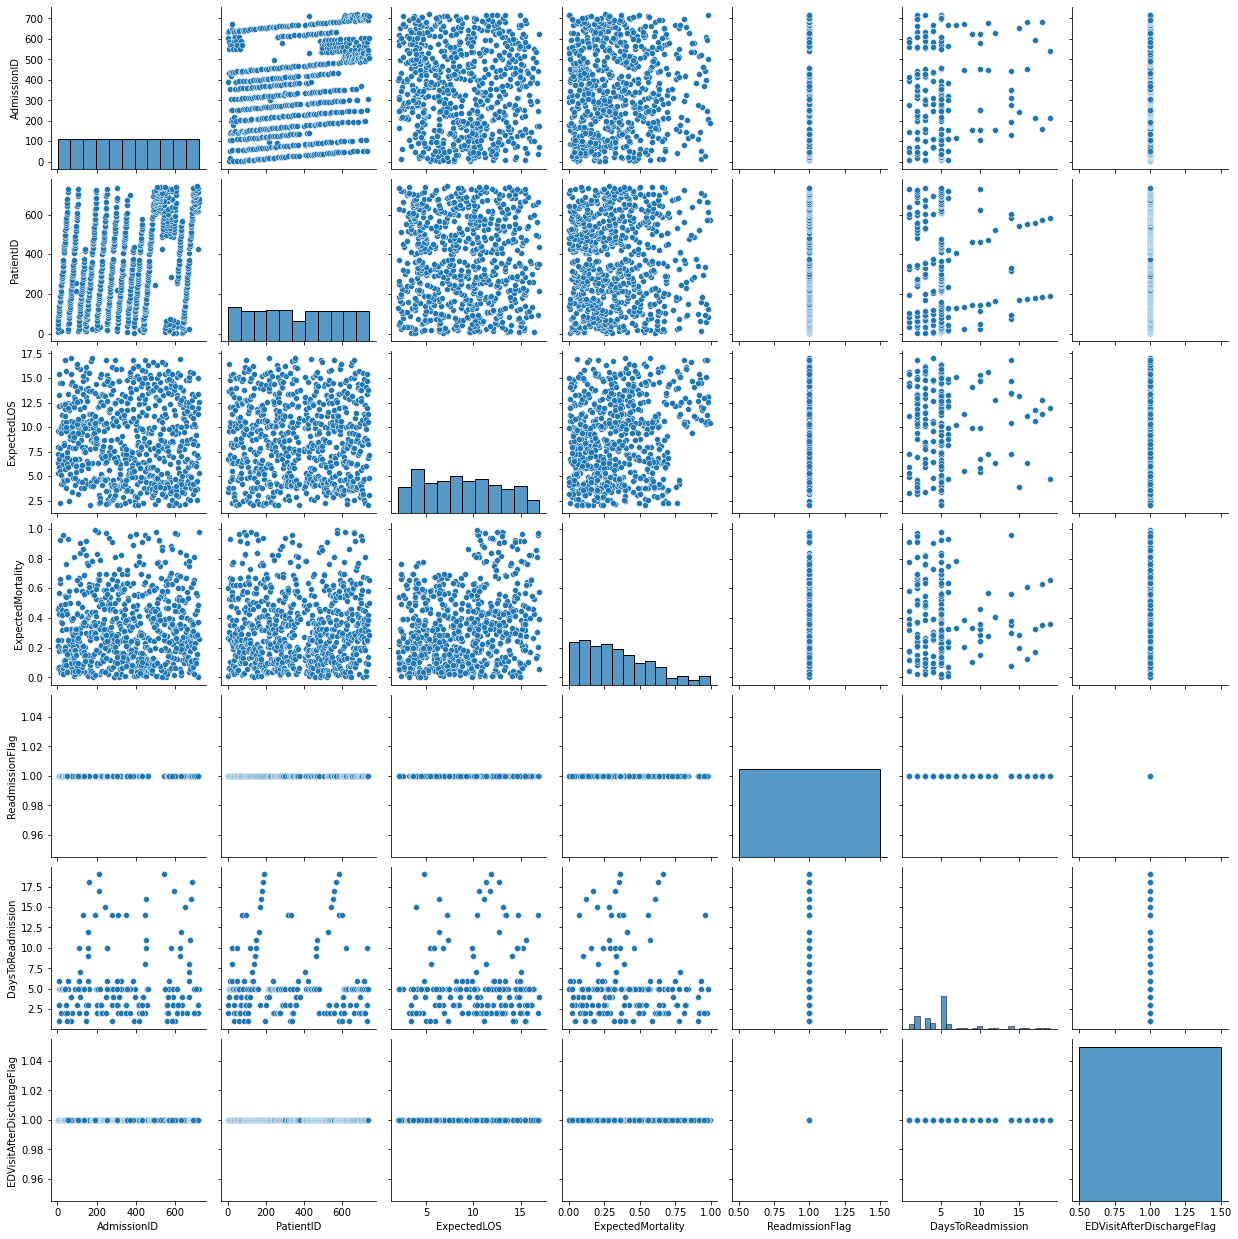

In [134]:
sns.pairplot(dfreadr_1)
plt.show()

In [153]:
corr_Los_Mortality = dfreadr_1['ExpectedLOS'].corr(dfreadr_1['ExpectedMortality'])
print('The correlation coefficient between Expected LOS and Expected Mortality is',corr_Los_Mortality)

The correlation coefficient between Expected LOS and Expected Mortality is 0.22072535026376863


**Notes:**  
`sns.pairplot()` will only work on **numerical dtype**. In this case, there are 7 columns. However, the meaningful numerial data for analyzing the correlation are `ExpectedLOS`, `ExpectedMortality`, `DaysToReadmission`;  
The correlation between `ExpectedLOS` and `ExpectedMortality` is 0.22, positive but not significant;  
We will do more explorary analysis on `ReadmissionFlag`, `EDVisitAfterDischargeFlag`, the ObservedMortality and ObervedLOS in our additional questions. 

<div class="alert alert-block alert-info"><b>Question 2:</b>  Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200</div>

In [16]:
dfpat[['FirstName','LastName']].iloc[101:201]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


<div class="alert alert-block alert-info"><b>Question 3:</b>  
    Create a figure object called fig using plt.figure()<br>
    Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax  <br>
    Plot (x,y) on that axes and set the labels  <br>
    Note : You can plot on any x,y set of values</div>

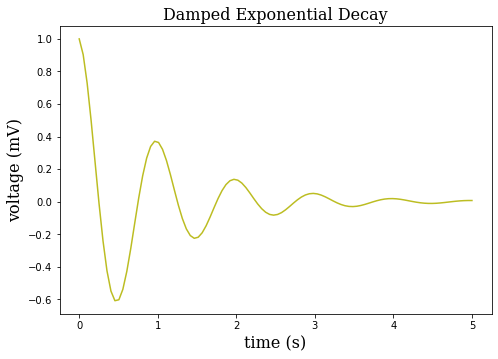

In [29]:
## Plot on the Damped Exponential Decay
x = np.linspace(0.0, 5.0, 100)
y = np.cos(2*np.pi*x) * np.exp(-x)

rect = (0,0,1,1)
fig = plt.figure()
ax = fig.add_axes(rect)

plt.plot(x, y, 'tab:olive')
plt.title('Damped Exponential Decay', fontdict = font) 
plt.xlabel('time (s)', fontdict=font)
plt.ylabel('voltage (mV)', fontdict=font)
plt.show()

<div class="alert alert-block alert-info"><b>Question 4:</b>  Display data by splitting age in 4 quartiles and labeling the quartiles</div>

In [138]:
dfage_4 = pd.DataFrame()

now = pd.Timestamp('now')
dfage_4['Age'] = (now - pd.to_datetime(dfpat['DateOfBirth'], format='%m%d%y')).astype('<m8[Y]')
dfage_4

,Age
0,63.0
1,37.0
2,46.0
3,54.0
4,60.0
...,...
940,36.0
941,52.0
942,40.0
943,59.0


In [14]:
quantile_4 = {'Quantile': ['Quantile1','Quantile2','Quantile3','Quantile4'],
              'Age': [np.quantile(dfage_4['Age'],.25),np.quantile(dfage_4['Age'], .5),np.quantile(dfage_4['Age'], .75),np.quantile(dfage_4['Age'], 1)]
               }
dfquantile_4 = pd.DataFrame(quantile_4)
display(dfquantile_4)

,Quantile,Age
0,Quantile1,42.0
1,Quantile2,49.0
2,Quantile3,56.0
3,Quantile4,63.0


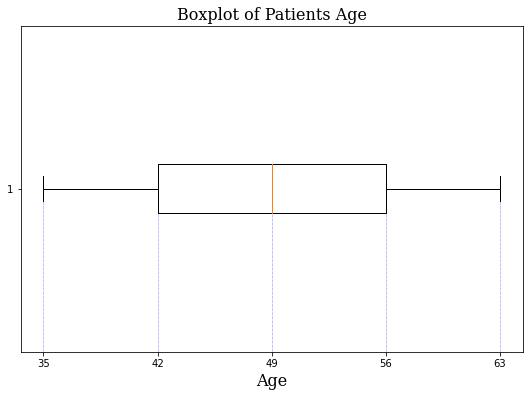

In [15]:
fig = plt.figure(1, figsize= (9, 6))
ax = fig.add_subplot(111)

ax.boxplot(dfage_4['Age'], vert=False, manage_ticks=True)
ax.set_title('Boxplot of Patients Age', fontdict=font)
ax.set_xlabel('Age', fontdict=font)
#ax.set_yticks([1])
#ax.set_yticklabels(['category'])

quantiles = np.quantile(dfage_4['Age'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

**Notes:**    
Q1(25%): The left side of the box
Q2(50%): The center red line
Q3(75%): The right side of the box
Q4(100%): The right end

<div class="alert alert-block alert-info"><b>Question 5:</b>  Display full name of patients who are born in 1986</div>

In [16]:
dfpat_5 = pd.DataFrame(dfpat[['FirstName','LastName','DateOfBirth']])

# Combine FullName
dfpat_5['FullName'] = dfpat_5[['FirstName','LastName']].apply(lambda x: ' '.join(x), axis=1)

# Extract the birth year from date of birth
dfpat_5['YearOfBirth'] = pd.DatetimeIndex(dfpat_5['DateOfBirth']).year

# Display full name of patients who born in 1986
dfpat_5[dfpat_5['YearOfBirth'] == 1986][['FullName','YearOfBirth']]

,FullName,YearOfBirth
23,Gabriel Joseph,1986
24,Lincoln Brenda,1986
29,Ala Halpert,1986
72,Lolita Darci,1986
164,Fadel Bernardt,1986
238,Bentley Kippax,1986
367,Vale Olanda,1986
373,Britt Dureden,1986
386,Cristabel Chatel,1986
415,Constantia Group,1986


<div class="alert alert-block alert-info"><b>Question 6:</b> 
Create a jointplot on expected mortality & expected length of stay.

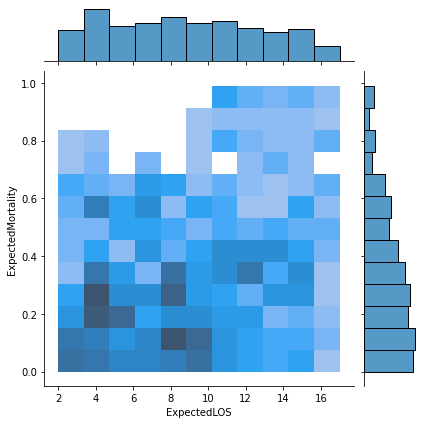

In [20]:
sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality",
              kind = "hist", data = dfdis)


<div class="alert alert-block alert-info"><b>Question 7:</b> 
Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition. 

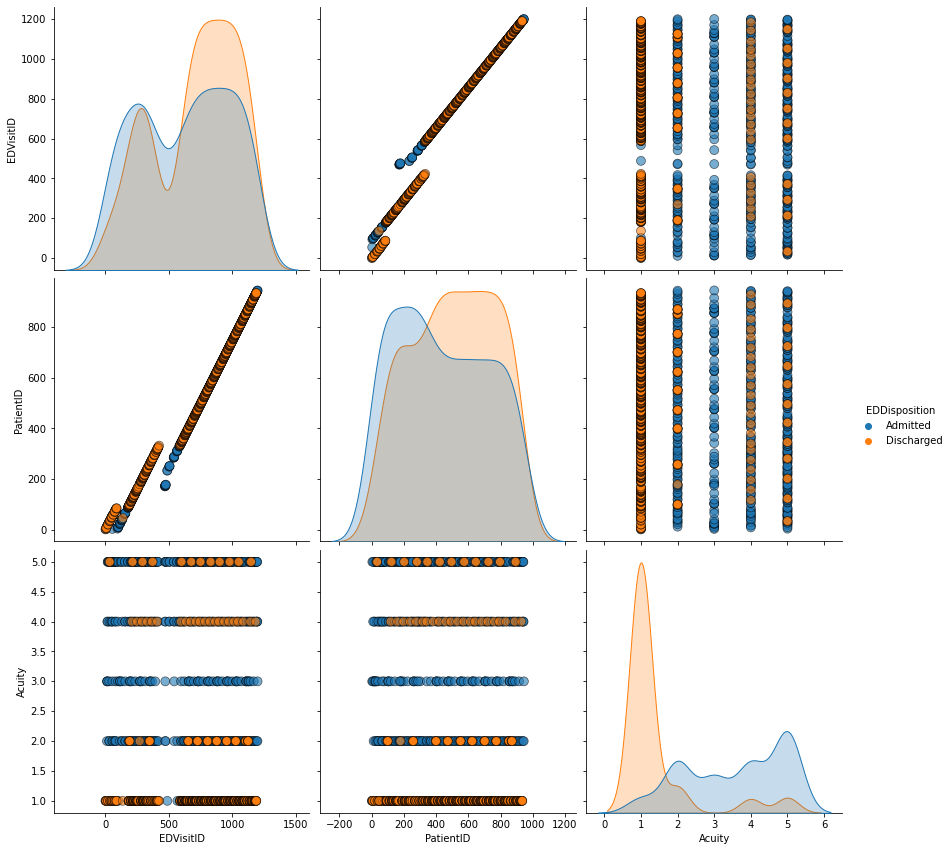

In [22]:
sns.pairplot(dfeduni,hue='EDDisposition',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height= 4)

<div class="alert alert-block alert-info"><b>Question 8:</b> 
Create a bar chart between expectedLOS & Primary diagnosis.

In [10]:
dfreadr_8 = dfreadr[['PrimaryDiagnosis', 'ExpectedLOS']].groupby('PrimaryDiagnosis').mean().reset_index()
dfreadr_8

,PrimaryDiagnosis,ExpectedLOS
0,AMI,12.372461
1,Afib,12.843702
2,Broken Leg,4.801676
3,Diabetes,6.562729
4,Fever,6.664651
5,Flu,6.268799
6,Heart Failure,12.895712
7,Hip Fracture,3.474971
8,Hypertension,5.537393
9,Kidney Failure,6.702315


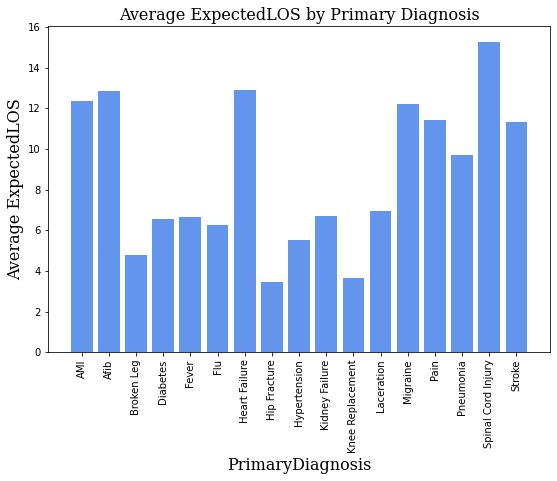

In [11]:
fig = plt.figure(1, figsize= (9, 6))

plt.bar(dfreadr_8.PrimaryDiagnosis, dfreadr_8.ExpectedLOS, color = "cornflowerblue")
plt.xlabel("PrimaryDiagnosis", fontdict = font)
plt.xticks(rotation=90)
plt.ylabel("Average ExpectedLOS", fontdict = font)
plt.title("Average ExpectedLOS by Primary Diagnosis", fontdict = font)

plt.show()

**Note:**  
We can not directly pull columns dfreadr.PrimaryDiagnosis, dfreadr.ExpectedLOS to make a bar chart. The y-value is not explainable that way. 

<div class="alert alert-block alert-info"><b>Question 9:</b> 
Get the list of patient ID's which are not there in ReadmissionRegistry.

**Solution1:**  
complement = (union - intersection) = (outter merge - inner merge)

In [13]:
dfpat_9 = pd.DataFrame({'PatientID': dfpat.PatientID})
dfreadr_9 = pd.DataFrame({'PatientID': dfreadr.PatientID})

In [14]:
union_9 = dfpat_9.merge(dfreadr_9, how='outer', on = 'PatientID')
union_9

,PatientID
0,1
1,2
2,3
3,4
4,5
...,...
956,941
957,942
958,943
959,944


In [15]:
intersection_9 = dfpat_9.merge(dfreadr_9, how = 'inner', on = 'PatientID')
intersection_9

,PatientID
0,1
1,2
2,3
3,5
4,6
...,...
715,738
716,739
717,740
718,741


In [17]:
## output the list of index that df.PatientID is in union while not in intersection
idx_complement_9 = union_9.loc[~union_9['PatientID'].isin(intersection_9.PatientID)].index
idx_complement_9

Int64Index([  3, 142, 152, 196, 207, 233, 243, 387, 391, 392,
            ...
            951, 952, 953, 954, 955, 956, 957, 958, 959, 960],
           dtype='int64', length=241)

In [19]:
union_9.iloc[idx_complement_9]

,PatientID
3,4
142,135
152,145
196,189
207,200
...,...
956,941
957,942
958,943
959,944


**Solution2:**  
Use `for` loop to label a cell in dataframe1 exsits in dataframe2 or not

In [139]:
dfpattest=dfpat.copy()
dfpattest['exists'] = np.nan #is defined as a substitute for declaring value 
for x in list(dfpattest.loc[dfpattest.PatientID.isin(dfreadr['PatientID'])].index):# loc gets rows (and/or columns) with particular labels
    dfpattest['exists'].iloc[x] = 'Exists'

dfpattest

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,exists
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Exists
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,Exists
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Exists
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,NaN
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,Exists
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,NaN
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,NaN
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,NaN
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,NaN


In [25]:
dfg=dfpattest[dfpattest['exists'].isna()]
dfg[['PatientID']]

,PatientID
3,4
134,135
144,145
188,189
199,200
...,...
940,941
941,942
942,943
943,944


<div class="alert alert-block alert-info"><b>Question 10:</b> 
Create a boxplot on ExpectedLOS by taking service into account.

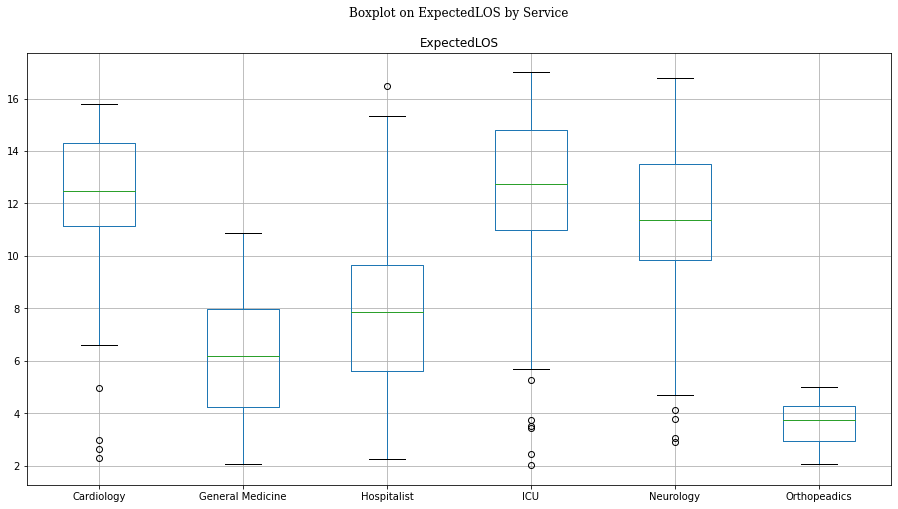

In [20]:
bp = dfreadr.boxplot(by ='Service', column =['ExpectedLOS'],figsize=(15,8))
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]

fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Boxplot on ExpectedLOS by Service', fontdict = font)

plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4IAAAH9CAYAAABP4sJcAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAA7eUlEQVR4nO3de7gdZ1k3/u9tU6CFUsDWipyiIhgoAhrwFSPsWOGHFgVf8BAOL6XRvqgET7y0EgWqRlsRQamohZQWgXAQqEKhAiUbDCAIlEIhICoFykFOUkgp9MDz+2Nmpyu7eyc7+5C1dubzua517Vkzs2buNfPsWXPP88wz1VoLAAAAw/Ed4w4AAACAQ0siCAAAMDASQQAAgIGRCAIAAAyMRBAAAGBgJIIAAAADIxEEOISq6sFV9YGqalX1tqraVVX/UVUvrqpbrOB6b1ZV0/16167Uehajqo4fie2yfnjm9dVxx7cYVbW5qq6oqvP797P3++3m+dzPVtXb++/+r1X1gqo6ftY8j6yqd/Xz7KqqV1TV+jmWtaz7vKruUlX/2Md3Sb/s31jqcudZ1y2q6tNVdfRKLB+ApDxHEODQqqqpJDuTHNlau76qjkvy70n+qLX2nBVed0vyva21K5Zz3uXQr+/BrbW3jIybbq1NHYr1zxHPKUlOWez6q+qZSda21k7p309lZL/PMf9jkpye5CGttc/3434zyf9Ncv/W2p6qumuSdya5b2vtM1X1HUlekGR3a+3P54ljWfZjVe1M8qrW2vNHvs/zWmv3Wspy97O+27TWvroSywZAjSDA2LXWvpTk40nuOu5YJtBTxx3AoVBVxyQ5J8nvziSBSdJa+8skX0/ylH7UfZNc0Vr7TD/920mek+SjhyDM+yeZHoltOslLV2plkkCAlSURBBizqrp7knskuWRk3P36JoRv7//erx//7Kq6pqo+VlW3qqqLq+rKqnpcVT2/qr7az/OGqrq0qv5+vuZ11fl/fRPEXVV1Xp+QpKre2M/28r4J4B3m+PyRVfWsqnpn/3pWVR3ZT3tNVX2zqk6vqgv75q+/fpDbZbq19p5++GVV9e2qekff5PGD/TIfPLKuP+y3x4eq6jlVdcTIsma+579U1fOq6mYj0x7TT3tr/zqpqh6U5Iwk9+m///P6eb+rX9/b++/8iJHlHN9v9/dU1auS7NOk8wAekuSWGUm0Rlyc5JH98CeT3LeqHj4zsbV2eWvt9QdY/sP7bfPhqjqjj/fMqrquLyd3rap7VdVHqmp3zWqOOrLup1bVLUfWfdbM8HzbpqruX12z2Cv6/fDO6pqrfrAvyy/q5/udqvpSVT23ql7a79OpkeX/br+fdvbb+Yf78bfqy+6uftlPPMC2ACBJWmteXl5eXofwlWQqSUvytiTvSFfj8+zc2Fz/2CRfSjLVv9/Qv79N//70JP+W5Ij+cz80suzpJLuSHJnuYt8bk/zJyPSWrrlikjwuyYeTHN2/f2GS7XPNO8/3+IMkb+njOCLJPyf5g5HpVyR5fj98/yR7kqzZz/Jaksv67zCdZHrW9L9J8tp++MVJvmfWul6epJLcol/Oaf20xyTZneTofvork/x+P+0BST6f5Pj+/aOSnN8PnzJHDG9K8of98O2TfHlke74yyd/1w7dO19z3/Dn2+022Qb9PPzPPdjktyTdG3v9Vkm8n+UiSp49uh/1s1z/ph2+X5HPpmp8myT8ledqsZX/fPMs5qf++X03yoiQPOohtM5Xk2iQ/1b//8yTfmeSaJHfsx61J8ppZ+3Tmf+DRSS7PjWX1KUme2Q+/IMmL++FjkvxXkg3j/j/38vLymvSXGkGA8TmptfbjSU5IcmK6RCxJHpbka61repfW2q4k/5Pk5/rpM/eCvayf74Ozlvvq1tp1rWs2+LIkvzzP+v9Pkle01r7Rv39RksdV1ZoFxv9/0p2A39BauyFdcvaEWfNc3P/9YLoar+86wDJ/t7U21ea+L++pSX64ql6eZGdr7bOzpr+idb6Z5B9y4/c+JcnLW2vfaK21JDvSJcHp431Da+2L/fsL0yWcN9HXij44yfYkaa19Ll3Svamvffz5JC/pp31t5Lsvq9bak5P8YB/r5iQfr6qTDvCxV/Wf/UqSN+TGbfPi9Nuir829c2vtv+ZZ7yVJ7pwuCVubZGdV/V3/2Xm3zcgirm79/Z+ttae01r6c7uLBzL54aP9+Lk9I8sqRsvqCJP9Q3T2SjxtZ79eTvG5kmQDMQyIIMGb9ye3fJnlC3+zujkm+OGu2L/bj0yddv5PkF5O8Zo5F/s/I8JfT1c7MZfZ6vpiuJvFAydr+Pn/HWfN8rY/5m/37m2WBZieD/Un+7yd5RLqT/dnm+953TPLovonndLrat2/P9R1aa9e31t49T0gz3+3FI8v6/nQJ7vHparS+NDL/V+b/djfxn0mOn2laO8sd0t1Duldr7d9ba09L8n3p7tN7xgGWP9+2eV2SE6rq/kl+JgdIXltrV7fWXtha25hkY5Jfqarvz/63zYyr5ljki9NdUEi68vyKeVY9ez9d1Vq7PN12v3mSPxtZ74P6cQDsx0Kv+gKwsm5I12zxiCSfzk3vLzs+yZUj7x+drgbxb6vqJ/ravxmjjyY4Ll1TwLnMXs/xSa5L8t8LjHmuz185z7yLUlUPaq29rR+udMnKPyZ5XvatbUrm/96fTvLm1tqzRpZ73Mi040fGr0lyz9baZXOE8+n+76NmahCre+THmnRNHK/vl7W7n+87F/D9jk3X9PdNSa5Ol8S8ZdZsD0nX7DRV9aNJ1rXWzk+6iwJVdWGSPz3Aqm6XrqllMrJtWmvfqqpXpkvGbpfkSfuJ9W9aa78287619raq+nK6ZrD72zb78/okL6iqB/fL/Oo8883eTzMXTD6e5FtJntRa+7d+2pHpmgEDsB9qBAHGrG/e9otJ3tc3KXx9kmOq6oH99AckuW26+7lSVT+d7v6zX09X4/LkWYv8ueo6cvmOdPfHvXyeVZ+f5Ber6qj+/eOT/H1f45h09/QdXVWPrapHzfP5x1bVEf26HpuueelyOnNk+InpmjieluSBox219B5ZnVsk+YXc+L3PT/IL/fiZxx783ci0nxlJDH8pXVPSpLt38+j+M69O8oV0Cdtos8O/TbKx32avyY3NLG+d5OQFfL/bJvmFfr9vSfLnVXXCzMSqelKSo9L1DJp++LSZDlv67f7zSd5+gPX8cj//d6ZLpkfLxIvTJdXVNx2dz0/1NYczsT0o3f2HH+2b6c65bfYXVGvt2nS1gOenb746j/PTldWZBO+3kjy0vwCyt3lr7/dzYy0jAPNQIwhwCPU1HzM1U5dU94y3o5N8Jl0Sktba16rqoUme3Z/otyQ/01r7alX9v3RNG1+Wrsbplkn+pKrWttZ+q1/uO9IlJXdK18HGH1fXS+ab+ukvr6pHttZeVlXfk+StVXVDutqV0aTyr9MlDF9L14nKbM9K17HNv/Tv35nkrP57vjjJdyd5blX9fLpObWbW/TOjCUd1D1c/t3/79Fm9Pt6zn+fZSU5Ncna6zkC+neS8qvrBdmPPlR9Kd//bndLVqs3cN/ayqrp9krdV1dX99/m//bR3VtVTkryuqr6Vrmnnqf3y3ppka1W9I8l7W/fMx8cleX7/nZLkja21mWaqT0pyQVX9W5LP9p9/WFU9Pd3zA2eS2lf0+z3p9v0X+lheUlVfT/Lqfn/cPF2nNxtH7o37cJL3pCs716Tb/x9I8rTMMmuff7Wq3pLke5L8ZWttZvzMNvhK+lrH/fizJM+qqm+nq7n+dpKHt9au6afPuW2q6h5Jnpvku/umm/97VsJ5QbryNdNTbarqpbmx/Gwe2Ydvraprk3wsyUzt5O/0870zXY32pUn+8ADfBWDwPFAe4DDSn2ifP9N0cCiq6op0D3+fHnMoq1JVXZzk5/oaOgAGQI0gAAxQVf1AuvsFr0ryn5JAgGFxjyDAYaKqnp/kPknOqKqF3J92WKiq1+TGZoQ/Mu54VpFj0z1KY3tubK4MwEBoGgoAADAwagQBAAAGRiIIAAAwMBJBAACAgZEIAgAADIxEEAAAYGAkggAAAAMjEQQAABgYiSAAAMDASAQBAAAGRiIIAAAwMBJBAACAgZEIAgAADIxEEAAAYGAkggAAAAMjEQQAABgYiSAAAMDASAQBYAVU1SlVtWvccQDAXCSCAEyMqrqiqq6pqj0jr3PGFMt0Vf3KMi6vVdVd55n2sKp6T1VdXVVfrqqXVtUdR6bfrKqeXVVX9tvkE1X1nOWKDYDhkQgCMGl+trV2q5HXk8Yd0EqqqkcleVmSv0xyXJJ7JvlWkl1Vddt+tt9Lsj7J/ZMck2RjkksPfbQAHC4kggBMvKr6m6r6h5H3Z1fVJdWZ6mvKnlZVX+prFR8zMu/Nq+rPq+pTVfXfVfW3VXXUyPSHV9UHquprVfWfVfXQqtqW5CeSnDNaK1lVP1hVb66qr1TVx6rqF0eW851V9U/9ct6T5PsX8L0qybOT/HFr7aWttWtaa59P8itJ9iT57X7W+yV5bWvts61zRWvtxUvZpgAMm0QQgNXgd5P8UH/f3U8k2Zzk8a211k//7nS1aXdI8vgk51bV3ftpZye5W5L7JLlrP8/Tk6Sq7p/kxUn+X5LbJHlgkitaa1uT/EuSJ83USlbVLZO8OV3t3Xcl2ZTk+VV1z349f53km0lun+TU/nUgd09y5ySvGh3ZWvt2klcneXA/6l+T/E5V/XpV3atPIAFg0SSCAEyaC6vqqyOvX22tfSPJY5P8RZKXJNnSWrty1uf+oLX2rdba25JclOQX+4TpV5P8dmvtK621ryf5kyS/3H9mc5LzWmtvbq19u7X2mdbaR+eJ62HpksQXtdaub629P12y9qiqOiLJI5M8vbV2dWvt8iQXLOC7Htf//dwc0z43Mv1P0yW0j0ny3iSfqarHL2D5ADCnNeMOAABmeURr7S2zR7bW3lNV/5WuNu6Vsyb/T2vt6pH3n0zyPUmOT3J0kveNVKJVkiP64TslecMC47pLkh+tqq+OjFuT5O/79axJ8ulZMRzIl/q/t0/yiVnTbj8zvbV2Q7oax7/um7WemuS8qnpPa233AuMHgL3UCAKwKlTVbyS5eZLPJnnqrMm37ZtuzrhzP9+XklyT5J6ttdv0r2Nba7fq5/t05r+Xr816/+kkbxtZzm36ZqO/luSLSa5Pl1iOxnAgH0tyZZJfmPVdvyNdDeMlNwmqu4/wr5P8T5J7LGAdAHATEkEAJl5V3S3JH6drHvq4JE+tqvvMmu3M/jELP5GuGeer+nvtXpDkOVX1Xf2y7lBV/1//me1JnlBVJ1XVd/TTfrCf9t9Jvm9k+a9PcreqelxVHdm/7ldV6/oau9ckeWZVHV1V90h3r+JsN6uqW8y80v0OPyXJ71fVo6vqqKr67iQvTHLrJM/pY/6tvlOco6pqTd8s9JjoORSARZIIAjBpXjfrOYKvTXdf4Nmttctaax9P8rQkf19VN+8/8/l0NWSfTfLSJE8cudfv9CT/keRfq+prSd6SrpOWtNbek+QJ6RKuq5K8LV0T0KR7nMOjqup/quqv+vsLH5Lu/sLP9us8O10tZZI8Kcmt+vHnJ3nRHN/tw+lqKGdeT2itvSJdcvvb6WowP5LkqCQ/3lr7cv+5a9L1Lvr5fp7fSPLI1tp/LXyzAsCN6sYO1wBg9amqqSQvaa3d8QCzAgA9NYIAAAADIxEEAAAYGE1DAQAABkaNIAAAwMBIBAEAAAZmzaFc2XHHHdfWrl17KFe5qlx99dW55S1veeAZYQ7KD0uh/LAUyg9LofywFMrP/r3vfe/7Umvt+LmmHdJEcO3atXnve997KFe5qkxPT2dqamrcYbBKKT8shfLDUig/LIXyw1IoP/tXVZ+cb5qmoQAAAAMjEQQAABgYiSAAAMDASAQBAAAGRiIIAAAwMBJBAACAgZEIAgAADIxEEAAAYGAkggAAAAMjEQQAABgYiSAAAMDASAQBAAAGRiIIAAAwMBJBAACAgZEIAgAADIxEEAAAYGAkggAAAAOzZtwBAADjUVXjDuEmWmvjDgFgENQIAsBAtdaW5XWX01+/bMsC4NCQCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGL2GAgBw0PQ6C6ubGkEAAA6aXmdhdZMIAgAADIxEEAAAYGAkggAAAAMjEQQYsB07duTEE0/MSSedlBNPPDE7duwYd0gAwCGg11CAgdqxY0e2bt2a7du354YbbsgRRxyRzZs3J0k2bdo05ugAgJWkRhBgoLZt25bt27dn48aNWbNmTTZu3Jjt27dn27Zt4w4NAFhhEkGAgdq9e3c2bNiwz7gNGzZk9+7dY4oIADhUJIIAA7Vu3brs2rVrn3G7du3KunXrxhQRAHCoSAQBBmrr1q3ZvHlzdu7cmeuvvz47d+7M5s2bs3Xr1nGHBgCsMJ3FAAzUTIcwW7Zsye7du7Nu3bps27ZNRzEAMAASQYAB27RpUzZt2pTp6elMTU2NOxwA4BDRNBQAAGBgJIIAAAADIxEEAAAYGIkgAADAwBwwEayq86rqC1V1+azxW6rqY1X14ar6s5ULEQAAgOW0kBrB85M8dHREVW1M8vAkP9Rau2eSP1/+0AAAAFgJB0wEW2tvT/KVWaN/LclZrbVv9fN8YQViAwAAYAUs9h7BuyX5iap6d1W9rarut5xBAQAAsHIW+0D5NUlum+R/JblfkldW1fe11trsGavqtCSnJckJJ5yQ6enpRa7y8Ldnzx7bh0VTflgK5YelUn5YCuWHxfL7tXiLTQSvTPKaPvF7T1V9O8lxSb44e8bW2rlJzk2S9evXt6mpqUWu8vA3PT0d24fFUn5YCuWHJbn4IuWHxVN+WAK/X4u32KahFyb5ySSpqrsluVmSLy1TTAAAAKygA9YIVtWOJFNJjquqK5M8I8l5Sc7rHylxbZLHz9UsFAAAgMlzwESwtbZpnkmPXeZYAAAAOAQWe48gI6pq3CHchApaAABgPou9R5ARrbVled3l9Ncv27IAAADmIxEEAAAYGIkgAADAwEgEAQAABkYiCAAAMDASQQAAgIGRCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGIkgAADAwKwZdwAALF5VjTuEm2itjTsEAOAA1AgCrGKttWV53eX01y/bsgCAyScRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwa8YdAABwcO595pty1TXXjTuMfaw946Jxh7DXsUcdmcue8ZBxhwEw0SSCALDKXHXNdbnirJPHHcZe09PTmZqaGncYe01SUgowqTQNBQAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZmzbgDGKd7n/mmXHXNdeMOYx9rz7ho3CHsdexRR+ayZzxk3GEAAADLbNCJ4FXXXJcrzjp53GHsNT09nampqXGHsdckJaUAAMDy0TQUAABgYCSCAAAAA3PARLCqzquqL1TV5XNMe0pVtao6bmXCAwAAYLktpEbw/CQPnT2yqu6U5MFJPrXMMQEAALCCDpgIttbenuQrc0x6TpKnJmnLHRQAAAArZ1H3CFbVzyX5TGvtsmWOBwAAgBV20I+PqKqjk2xNsqAHzFXVaUlOS5ITTjgh09PTB7vKFTVJ8ezZs2ei4kkma/uwf5NYflhdlJ/VZZL21yQefyYtHvbP/mKxJvH4s1os5jmC35/ke5NcVlVJcsck76+q+7fWPj975tbauUnOTZL169e3SXpOXi6+aKKe2zdpzxGctO3D/k1c+WF18f++ukzY/pq448+EbR8OwP5iCSbu+LOKHHQi2Fr7UJLvmnlfVVckWd9a+9IyxgUAAMAKWcjjI3YkeVeSu1fVlVW1eeXDAgAAYKUcsEawtbbpANPXLls0AAAArLhF9RoKAADA6iURBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYA74QHkAAA4f9z7zTbnqmuvGHcY+1p5x0bhD2OvYo47MZc94yLjDgBUnEQQAGJCrrrkuV5x18rjD2Gt6ejpTU1PjDmOvSUpKYSVpGgoAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBWTPuAACAg3PMujNyrwvOGHcY+7pg3AHc6Jh1SXLyuMMAmGgSQQBYZb6++6xccdbkJDrT09OZmpoadxh7rT3jonGHADDxNA0FAAAYGIkgAADAwEgEAQAABkYiCAAAMDASQQAAgIEZdK+hut/eP91vAwDA4WnQiaDut/dP99sAAHB40jQUAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBOWAiWFXnVdUXqurykXHPqqqPVtUHq+q1VXWbFY0SAACAZbOQGsHzkzx01rg3JzmxtfZDSf49ye8tc1wAAACskAMmgq21tyf5yqxxb2qtXd+//dckd1yB2AAAAFgBa5ZhGacmecV8E6vqtCSnJckJJ5yQ6enpZVjl8pmkePbs2TNR8SSTtX3Yv0ksP6wuys/qMkn7axKPP5MWz6SZpO2j/LAUk1h+VoslJYJVtTXJ9UleOt88rbVzk5ybJOvXr29TU1NLWeXyuviiTFI809PTExXPpG0f9m/iyg+ri//31WXC9tfEHX8mbPtMnAnbPsoPSzFx5WcVWXQiWFWPT/KwJCe11tryhQQAAMBKWlQiWFUPTXJ6kge11r6xvCEBAACwkhby+IgdSd6V5O5VdWVVbU5yTpJjkry5qj5QVX+7wnECAACwTA5YI9ha2zTH6O0rEAsAAACHwEKeIwgAAMBhRCIIAAAwMBJBAACAgZEIAgAADIxEEAAAYGAkggAAAAMjEQQAABgYiSAAAMDASAQBAAAGRiIIAAAwMBJBAACAgVkz7gAAADh0jll3Ru51wRnjDmNfF4w7gBsdsy5JTh53GLDiJIIAAAPy9d1n5YqzJifRmZ6eztTU1LjD2GvtGReNOwQ4JDQNBQAAGBiJIAAAwMBIBAEAAAZGIggAADAwg+8sZuJuCL54cuI59qgjxx0CAACwAgadCE5Sj1lJl5ROWkwAAMDhR9NQAACAgZEIAgAADMygm4YCwGrlHvf5uccd4MAkggCwykza/eTucQdYfTQNBQAAGBg1gjBmVTXuEG6itTbuEAAAWEFqBGHMWmvL8rrL6a9ftmUBAHB4kwgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMzAETwao6r6q+UFWXj4y7XVW9uao+3v+97cqGCQAAwHJZSI3g+UkeOmvcGUkuaa39QJJL+vcAAACsAgdMBFtrb0/ylVmjH57kgn74giSPWN6wAAAAWCmLvUfwhNba55Kk//tdyxcSAAAAK2nNSq+gqk5LclqSnHDCCZmenl7pVa5qtg9LofywFMoPS6H8rC6TtL/27NkzUfEkk7V92L9JLD+rxWITwf+uqtu31j5XVbdP8oX5ZmytnZvk3CRZv359m5qaWuQqB+Dii2L7sGjKD0uh/LAUys/qMmH7a3p6eqLimbTtw/5NXPlZRRbbNPSfkjy+H358kn9cnnAAAABYaQt5fMSOJO9KcvequrKqNic5K8mDq+rjSR7cvwcAAGAVOGDT0NbapnkmnbTMsQAAcAisPeOicYewr4snJ55jjzpy3CHAIbHincUAADA5rjjr5HGHsI+1Z1w0cTHBECz2HkEAAABWKYkgAADAwEgEAQAABsY9ggBjcO8z35Srrrlu3GHsY5I6jzj2qCNz2TMeMu4wAOCwJREEGIOrrrluojpHmLQH8k5SUgoAhyNNQwEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAA7OkRLCqfruqPlxVl1fVjqq6xXIFBgAAwMpYdCJYVXdI8uQk61trJyY5IskvL1dgAAAArIylNg1dk+SoqlqT5Ogkn116SAAAAKykNYv9YGvtM1X150k+leSaJG9qrb1p9nxVdVqS05LkhBNOyPT09GJXOQi2D0uh/Kwuk7S/9uzZM1HxJJO1fTgw+4ulUH5YrEn8/VotFp0IVtVtkzw8yfcm+WqSV1XVY1trLxmdr7V2bpJzk2T9+vVtampq0cEe9i6+KLbP6nHvM9+Uq665btxh7OOUi68edwh7HXvUkbnsGQ8ZdxiTa8L+36enpycqnknbPhyA/cVSKD8swcT9fq0ii04Ek/xUkk+01r6YJFX1miQPSPKS/X4KDhNXXXNdrjjr5HGHsdekHQjXnnHRuEMAAGAeS7lH8FNJ/ldVHV1VleSkJLuXJywAAABWylLuEXx3Vf1DkvcnuT7JpembgAKwf8esOyP3uuCMcYexrwvGHcCNjlmXJJNT4w4Ah5ulNA1Na+0ZSZ6xTLEADMbXd5+lafF+aFoMACtrqY+PAAAAYJWRCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGIkgAADAwEgEAQAABkYiCAAAMDASQQAAgIGRCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGIkgAADAwEgEAQAABkYiCAAAMDASQQAAgIGRCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGIkgAADAwEgEAQAABkYiCAAAMDASQQAAgIGRCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGIkgAADAwEgEAQAABmbNuAM4HFTV8i3r7OVZTmtteRYEAAAcdtQILoPW2rK8du7cuWzLAgAAmI9EEAAAYGAkggAAAAMjEQQAABgYiSAAAMDASAQBAAAGRiIIAAAwMBJBAACAgZEIAgAADIxEEAAAYGDWjDsAWK2OWXdG7nXBGeMOY18XjDuAGx2zLklOHncYAADMYUmJYFXdJskLk5yYpCU5tbX2rmWICybe13eflSvOmpxEZ3p6OlNTU+MOY6+1Z1w07hAAAJjHUmsE/zLJxa21R1XVzZIcvQwxAQAAsIIWnQhW1a2TPDDJKUnSWrs2ybXLExYAAAArZSmdxXxfki8meVFVXVpVL6yqWy5TXAAAAKyQpTQNXZPkh5Nsaa29u6r+MskZSf5gdKaqOi3JaUlywgknZHp6egmrPLzt2bPH9lllJml/TWL5mbR4Js0kbR/lh6Wyv1gK5YfFmsTfr9ViKYnglUmubK29u3//D+kSwX201s5Ncm6SrF+/vk1SZxaTZtI6++AALr5oovbXxJWfCds+E2fCto/yw5LYXyyF8sMSTNzv1yqy6KahrbXPJ/l0Vd29H3VSko8sS1QAAACsmKX2GrolyUv7HkP/K8kTlh4SAAAAK2lJiWBr7QNJ1i9PKAAAABwKS+k1FAAAgFVIIggAADAwEkEAAICBWWpnMQDAKlVVy7ess5dnOa215VkQAPulRhAABqq1tiyvnTt3LtuyADg01AgCjMnaMy4adwj7unhy4jn2qCPHHQIAHNYkggBjcMVZJ487hH2sPeOiiYsJAFg5moYCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIACwKDt27MiJJ56Yk046KSeeeGJ27Ngx7pAAWCC9hgIAB23Hjh3ZunVrtm/fnhtuuCFHHHFENm/enCTZtGnTmKMD4EDUCAIAB23btm3Zvn17Nm7cmDVr1mTjxo3Zvn17tm3bNu7QAFgAiSAAcNB2796dDRs27DNuw4YN2b1795giAuBgSAQBgIO2bt267Nq1a59xu3btyrp168YUEQAHQyIIABy0rVu3ZvPmzdm5c2euv/767Ny5M5s3b87WrVvHHRoAC6CzGADgoM10CLNly5bs3r0769aty7Zt23QUA7BKSAQBgEXZtGlTNm3alOnp6UxNTY07HAAOgqahE8BzmAAAgENJjeCYeQ4TAABwqKkRHDPPYQIAYGiqalleGzduXLZlDY1EcMw8hwkAgKFprS3L6y6nv37ZljU0EsEx8xwmAADgUJMIjpnnMAEAAIeazmLGzHOYAACAQ00iOAE8hwkAADiUNA0FAAAYGIkgAADAwGgaCgDAQVvO567V2cuznCE+AgAWS40gAAAHbbme3bZz507PgYMxkAgCAAAMjEQQAABgYCSCAAAAAyMRBAAAGBiJIAAAwMBIBAEAAAZGIggAADAwEkEAAICBkQgCAAAMzJpxBwAAAKwO9z7zTbnqmuvGHcY+1p5x0bhD2OvYo47MZc94yLjDWBCJICzBJB14kiQXT048xx515LhDAGCC7dixI9u2bcvu3buzbt26bN26NZs2bRp3WBzAVddclyvOOnncYew1PT2dqampcYex18SdG+6HRBAWaZIOgkl34Jm0mABgLjt27MjWrVuzffv23HDDDTniiCOyefPmJJEMwiHiHkEAAA6pbdu2Zfv27dm4cWPWrFmTjRs3Zvv27dm2bdu4Q4PBWHIiWFVHVNWlVfX65QgIAIDD2+7du7Nhw4Z9xm3YsCG7d+8eU0QwPMtRI/ibSfzXAgCwIOvWrcuuXbv2Gbdr166sW7duTBHB8CwpEayqOyY5OckLlyccAAAOd1u3bs3mzZuzc+fOXH/99dm5c2c2b96crVu3jjs0GIyldhbz3CRPTXLMfDNU1WlJTkuSE044IdPT00tc5eFrz549tg9LovywFMoPi+X3i4N1+9vfPo95zGNy6qmn5lOf+lTufOc757GPfWxuf/vbK0urwCTto0k8/kxaPPNZdCJYVQ9L8oXW2vuqamq++Vpr5yY5N0nWr1/fJql710kzad3fsspcfJHyw+IpPyyB3y8WY2pqKn/0R3+k/Kw2E/Z7MXHlZ8K2z/4spWnojyf5uaq6IsnLk/xkVb1kWaICAABgxSw6EWyt/V5r7Y6ttbVJfjnJW1trj122yAAAOGzt2LEjJ554Yk466aSceOKJ2bFjx7hDgkHxQHkAYFF27NiRbdu2Zffu3Vm3bl22bt3qYeAsiAfKw/gtSyLYWptOMr0cywIAJp8TeZZi9IHyM/d4bd++PVu2bFF+4BBZjucIAgADM3oiv2bNmmzcuDHbt2/Ptm3bxh0aq4AHysP4aRoKABw0J/IsxcwD5Tdu3Lh3nAfKrw7HrDsj97rgjHGHsa8Lxh3AjY5Zl3SPWZ98EkEA4KA5kWcpZh4oP9O0eOaB8mqUJ9/Xd5+VK86anERn0h4fsfaMi8YdwoJJBAGAg+ZEnqWYuQ9wy5Ytezsb2rZtm/sD4RCSCAIAB23Tpk155zvfmZ/+6Z/Ot771rdz85jfPr/7qrzqRZ8E2bdqUTZs2TVyNDgyFRBAAOGg7duzIRRddlDe+8Y379Br6gAc8QDIIsApIBAGAg7Zt27Y8+tGP3qdp36Mf/WjN+wBWCYkgAHDQPvKRj+Tqq6/Oeeedt7dG8NRTT80nP/nJcYcGwAJ4jiAAcNBudrObZcuWLfs8R3DLli252c1uNu7QAFgANYIAwEG79tprc8455+S+973v3l5DzznnnFx77bXjDg2ABZAIAgAH7R73uEce8YhH3OQewQsvvHDcoQGwABJBAOCgbd26NVu3bt37HMGZXkM9RxBgdZAIAgAHzQPBAVY3iSAAsCgeCA6weuk1FAAAYGAkggAAAAMjEQQA4JDbsWNHTjzxxJx00kk58cQTs2PHjnGHBIPiHkEAAA6pHTt2zNnrbBIdDsEhokZwArgiBgAMybZt27J9+/Zs3Lgxa9asycaNG7N9+3aPH4FDSI3gmLkiBgAMze7du7Nhw4Z9xm3YsCG7d+8eU0QwPGoEx8wVMQBgaNatW5czzzxznxZRZ555ZtatWzfu0GAw1AiOmStiAMDQbNy4MWeffXbOPvvs3OMe98hHPvKRnH766XniE5847tBgMCSCY7Zu3brs2rUrGzdu3Dtu165drogBAIetnTt35vTTT895552X3bt3Z926dTn99NNz4YUXjjs0FmDtGReNO4R9XTw58Rx71JHjDmHBJIJjtnXr1mzevHnvPYI7d+7M5s2bNQ0FAA5bu3fvzqWXXpo//uM/zvT0dKampnLdddflT//0T8cdGgdwxVknjzuEfaw946KJi2m1kAiO2UyHMFu2bNl7RWzbtm06igEADltaRMH46SxmAmzatCmXX355Lrnkklx++eWSQADgsDbTImrnzp25/vrr97aI2rp167hDg8FQIwgAwCGlRRSMnxrBCeCB8gDA0GgRBeOlRnDMPFAeAAA41NQIjpkHygMAAIeaRHDMPFAeAAA41CSCYzbTffIo3ScDAAArSSI4ZrpPBmC10tkZwOqls5gx030yAKuRzs4AVjc1ghNA98kArDY6OwNY3SSCAMBB09kZwOomEZwA7rEAYLXR2RnA6uYewTFzjwUAq9FMZ2czv18znZ1pGgqwOkgEx2z0Hovp6elMTU1l+/bt2bJli0QQgImlszOA1U0iOGbusQBgtdq0aVM2bdq090ImAKuHRHDMZu6x2Lhx495x7rEAFqqqlm9ZZy/Pclpry7MgAGDF6CxmzDxQHliK1tqyvHbu3LlsywIAJp8awTFzjwUAAHCoLbpGsKruVFU7q2p3VX24qn5zOQMbEg+UB2A18vgjgNVrKTWC1yf53dba+6vqmCTvq6o3t9Y+skyxAQATyuOPAFa3RdcIttY+11p7fz/89SS7k9xhuQKDoaiqZXl98uyHLduyAA5k9PFHa9asycaNG7N9+3bPEQQWxPnP+C1LZzFVtTbJfZO8ezmWB0Oisw9gNfL4I2ApnP+M35I7i6mqWyV5dZLfaq19bY7ppyU5LUlOOOGETE9PL3WVh609e/bYPiya8sNSKD8crDvf+c4555xzct/73ndv+bn00ktz5zvfWVnioDj+sBTKz+LVUrLfqjoyyeuT/HNr7S8ONP/69evbe9/73kWv73DngbwshfLDUig/HKz57hHU8zUHy/GHpVB+9q+q3tdaWz/XtEXXCFbXkHZ7kt0LSQIBgMOHxx8BrG5LaRr640kel+RDVfWBftzTWmtvWHJUAMDE27RpUzZt2uSKPMAqtOhEsLW2K8nwutcBAABY5Zal11AAAABWD4kgAADAwEgEAQAABkYiCAAAMDASQQAAgIGRCAIAAAyMRBAAAGBgJIIAAAADIxEEAAAYGIkgAADAwEgEAQAABkYiCAAAMDASQQAAgIGRCAIAAAxMtdYO3cqqvpjkk4dshavPcUm+NO4gWLWUH5ZC+WEplB+WQvlhKZSf/btLa+34uSYc0kSQ/auq97bW1o87DlYn5YelUH5YCuWHpVB+WArlZ/E0DQUAABgYiSAAAMDASAQny7njDoBVTflhKZQflkL5YSmUH5ZC+Vkk9wgCAAAMjBpBAACAgZEILlBVfXdVvbyq/rOqPlJVb6iquy1yWc+sqqf0w39YVT91gPmnq0pvSGNQVSdU1cuq6r+q6n1V9a6q+vkxxnNKVZ0zz/hWVSeNjPv5ftyjDmL5a6vq8n54fVX91QHmf0NV3eYgvgKLUFV7Zr2fsxwscR3v7P+urapHL2D+BZeVhS6TyTVaBqvqbv3//n9U1e6qemV/rLxJufT7tfr1vyPPHnn/lKp65gqvc+/xhclXVXesqn+sqo/358l/WVU3m2O+fX4LVuK3bLGq6oqqOq4ffue44zlUJIILUFWV5LVJpltr399au0eSpyU5YSGfrap5t3Nr7emttbcsX7Qsl36/X5jk7a2172ut/UiSX05yxxVe75pFfvRDSTaNvP/lJJctNo7W2ntba08+wDw/01r76mLXweRorT2gH1yb5KCStgWUlYNeJpOpqm6R5KIkf9Nau2trbV2Sv0ky5zOqOCx8K8n/njlJXi4HOj9idejPlV6T5MLW2g8kuVuSWyXZNmu+NVklvwUjv4eHPf+AC7MxyXWttb+dGdFa+0CSS6vqkqp6f1V9qKoenuy94rG7qp6f5P1J7lRVW6vqY1X1liR3n1lOVZ0/U2NTVSdV1aX9ss6rqpvPDqSqNvXTL6+qs0fGb66qf++vvr6gqs6pqmOq6hNVdWQ/z637Kx5HrsxmOuz8ZJJrZ+33T7bWnpckVXVEVT2rqv6tqj5YVf+3Hz/V74d/qKqPVtVL+wNlqupHqupt1dUu/nNV3b4fP11Vf1JVb0vym1X1s1X17r48vKWqDnjRIcm/JLl/VR1ZVbdKctckH5iZuJ91/0hVXVZV70ryGyPzT1XV6/vhW1XVi/qy98GqemQ//oqqOm6kzL+gqj5cVW+qqqP6eb6/qi7u1/svVfWDi90h3FRV3aU/Dn2w/3vnfvwv9MeJy6rq7f24U6q7antxfzx6xshyZmp8zkryE1X1gar67X7f/kt/nHt/Vd3kB3JWWXlQ/9kP9OX3mNnLXOltwop6dJJ3tdZeNzOitbaztab25vB1fbrOOG7yv1tVx1fVq/vfwX+rqh/vx+9t+dS/v7w/lsx1fvSsfvqHquqX5ljHLUZ+fy6tqo39+KOrq43+YFW9ov/NXF/d+dBzRj7/q1X1F8u/Wej9ZJJvttZelCSttRvSlZVTq+rXq+pVVfW6JG/K3L8F39P/Jn28qv5sZqE1//nunqp6dv97dElVHd+Pn/NcY77zqar6zv5c5dKq+rskNbqOkeGn9nFcVlVn9eOeXF3rwA9W1ctXYqMeMq01rwO8kjw5yXPmGL8mya374eOS/Ee6grQ2ybeT/K9+2o+kq605Osmt+/me0k87P8mjktwiyaeT3K0f/+Ikv9UPTydZn+R7knwq3ZXXNUnemuQR/fgrktwuyZHpEoJz+s++KMkj+uHTkjx73Ntztbzm2+8j009L8vv98M2TvDfJ9yaZSnJVuprD70jyriQb+n3zziTH95/5pSTnjezj548s+7a5sTOnX5nZb0lOmdm3s2I5Jck5Sf4iycOSPCbJM0bK1/7W/cEkD+qHn5Xk8n54Ksnr++Gzkzx3NL7+7xV92V+b7mThPv34VyZ5bD98SZIf6Id/NMlbx71vV9sryQ3pkvqZ16dG/sdfl+Tx/fCp6a7KJt0x5w798G1GysnnknxnkqOSXJ5kfT9tz+z93r8/Oskt+uEfSPLefnjtPGXldUl+vB++Vbpj1T7L9Fp9r5Hy8RdJfnOeeW5yfEr/+zXu+L2Wtu/TnbtckeTYJE9J8sx+2suSbOiH75xkdz/8zPTnOf37y/tjxtrse370yCRvTnJEulZWn0py+1nHl99N8qJ++Af7eW7Rx/F3/fgT0/0GrU9yyyT/meTIfto7k9xr3NvxcH1l/nPkS/tpVya5XT9u9u/LKUn+qy9Xt0jyySR3yjznu/1nWpLH9MNPz42/hXOea2T+86m/SvL0fvjkfrnHzZT5/u9P9+Xn6P79zPf4bJKb98O3Gfc+WMprsU3Q6FSSP6mqB6Y7sN0hNzYX/WRr7V/74Z9I8trW2jeSpKr+aY5l3T3JJ1pr/96/vyBd7cxzR+a5X7rmqV/sl/PSJA/sp72ttfaVfvyr0lXNJ8kLkzw1XRPHJyT51cV+2aGrqr9Ol9Bd21q7X5KHJPmhuvEevGPTnShfm+Q9rbUr+899IN2P2lfT/Vi9uboKwiPSnZTPeMXI8B2TvKK6WrubJfnEAsN8eboD77Hpfjyf1o+/+1zrrqpj0x3E3tbP9/fpDnyz/VS6pqZJktba/8wxzydaV1OeJO9Lsra6mskHJHlVv96kS5o5ONe01u4z86aqTkl3wpMkP5bkf/fDf59k5orqO5KcX1WvTNdsZ8abW2tf7pfzmnRl+r37WfeRSc6pqvukS0gPdG/0O5L8RX98ek1r7cqRfc/hbb5uyHVPvsq11r5WVS9O9/tyzcikn0pyj5H/8Vv3rQD2Z/T8aEOSHa2rRfrv6lrF3C/dBcqMzPO8Po6PVtUn0x2HNiT5y3785VX1wX746qp6a5KHVdXudAnhhxb1xVmIytz/4zPj3zxzfjqPS1prVyVJVX0kyV3SXayc63z3wnTn2zPnSy9J8poDnGvMdz71wPS/na21i6pqrvOan0p3EeIb/Xwz3+ODSV5aVRf2Ma1aEsGF+XC6WpXZHpPuasWPtNauq6or0l3RSJKrZ817oB/ChZwpzTfPvJ9trb2jb4rxoCRHNM13DsaH012tTJK01n6junskZk6aK8mW1to/j36oqqbS3VMx44Z0/2uV5MOttR+bZ32jZeZ5Sf6itfZP/fKeuZCAW2vvqaoT0yUO/z5yQJxz3dV19LKQk7T5DvSjZn/no9LViH51NIlhxXWXTFt7YlX9aLornR/oE7m902fPvx+/neS/k9w73f785n5X3tpZVXVRkp9J8q91gM6wWHU+nORB80z7crqr76Nul+RLKxoRh8pz0zXnfNHIuO9I8mOttdHkMFV1ffa9/egWI8Ojv3Urcu6T7iL405J8NPvGy/Lb51wp6W5FSlezd0Nuej4823znSwvVsv9zjf2dTy3k3HyueU5Ol0j+XJI/qKp7ttauP4iYJ4Z7BBfmrUluXlV7a9Oq6n7prlp8oU8CN/bv5/L2JD9fVUf1V8p+do55PpquBuWu/fvHJXnbrHneneRB1d2TdUS6jkHeluQ9/fjbVncz7iNnfe7FSXbEwfBgvTXJLarq10bGHT0y/M9Jfq1uvAfzblV1y/0s72NJjq+qH+vnP7Kq7jnPvMcm+Uw//PiDjPv3cmNN4H7X3bqOXq6qqg39fI+ZZ5lvSvKkmTdVNftkb06tta8l+URV/UL/uaqqey/4m7AQ78yNtbWPSbIr6e6XaK29u7X29HQn4nfq53lwVd2uuns4H5GuBm/U15OMXtE/NsnnWmvfTndcOmJ/wfTr/VBr7ex0F01+cI5lsnq9LMkDqurkmRFV9dCquleSf0vy41X13f349emuyn96LJGyrPrakFcm2TwyevZvw336wSuS/HA/7ofT3TYxl7cn+aXq7rk/Pt3J9XvmmOcx/bLulq4J6sfSHet+sR9/jyT3Gon13emOeY9Od/7DyrkkydFV9X+Srv+EJM9Od2vKN2bNu9DfgvnOd5Mud5mpnHl0kl0HONeY73xqtFz9dG56ESvpyvepVXV0P9/tquvg6E6ttZ3pWtzdJt1tEKuSRHABWtcI+OfTnUD9Z1V9ON0VhTckWV9V701XmD46z+ffn64a+wNJXp3uHr7Z83wzXdPNV1XVh9JVff/trHk+l+4kf2e63iDf31r7x9baZ5L8Sbp/nLck+Ui6e9RmvDRdAXcwPAj9fn9EuoPRJ6rqPema7J7ez/LCdNv6/dV1c/132U8te2vt2nQHr7Or6rJ05WG+nqmema4s/EsO8mp6a+2N/QFqoet+QpK/rq6zmH2u6o744yS3rb7zkXQdKC3UY5Js7j/34SQPP4jPcmBPTvKEvlnU45L8Zj/+WdXfaJ/uB2+mB9ld6ZqQfiDJq1trs5uFfjDJ9dXdGP/bSZ6f5PFV9a/pmmMd6Orub42Uk2uSvHGOZbJK9TU/D0uypbrOHT6S7j6fL7TW/jtd+XtDdU3in5tkU38RgcPDs9PdFz7jyenOgz7Yl4Un9uNfneR2fTn4tST/nrm9Nt3x4bJ0F1+f2lr7/Kx5np/kiP7c6BVJTmmtfasff3x/7Du9X87ouc8rk7xjnlsZWCYj58i/UFUfT7evv5mbXpBOFvhbMN/5bj/56iT3rKr3peuo5g/78fOdazwzc59PnZnkgVX1/nS3+nxqjjguTvJPSd7bl+WnpLsY+pK+PF6a7v7Ir873XSbdzM2TrHJVdavW2p6+RvC16ToCeW0/7VFJHt5ae9xYgwTGqvp7C1trTzrQvACTrK8pOrK19s2q+v50NVN36y98prqejJ/TWrtknHGyvKpqT2tt1dbATRr3CB4+ntnfi3OLdFXZFyZJVT0vXecfPzO+0AAAltXRSXb2t2dUkl9rrV3b3/v+niSXSQJh/9QIAgAADIx7BAEAAAZGIggAADAwEkEAAICBkQgCAAAMjEQQAABgYCSCAAAAA/P/AxTSIBNVLoM3AAAAAElFTkSuQmCC

<div class="alert alert-block alert-info"><b>Question 11:</b> Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

In [21]:
ExpectedLOS = np.array([10,5,7,9])
Service= ["ICU", "Neurology", "General", "Medicine"]

df_11 = pd.DataFrame({'Service': Service,
                    'ExpectedLOS' : ExpectedLOS}).sort_values('ExpectedLOS', ascending = False)
df_11

,Service,ExpectedLOS
0,ICU,10
3,Medicine,9
2,General,7
1,Neurology,5


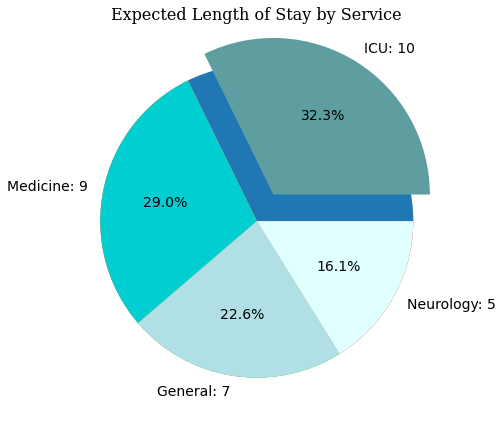

In [22]:
myexplode = [0.2,0,0,0]
colors = ['cadetblue','darkturquoise','powderblue','lightcyan']

fig = plt.figure(1, figsize= (9, 6))

plt.pie(df_11.ExpectedLOS)
plt.pie(df_11.ExpectedLOS, labels = df_11.Service + ': ' + df_11.ExpectedLOS.astype(str), 
        explode = myexplode, colors = colors, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Expected Length of Stay by Service', fontdict = font)
plt.tight_layout()

plt.show() 

<div class="alert alert-block alert-info"><b>Question 12:</b> Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)</div>

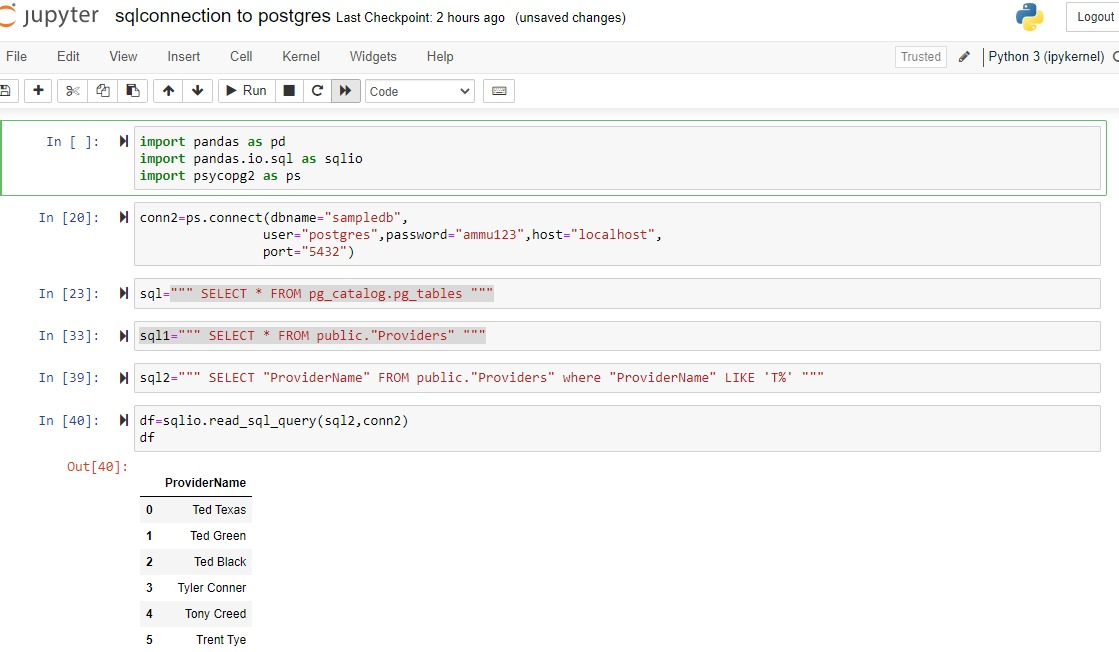

In [33]:
from IPython import display
display.Image('./12.jpeg')

<div class="alert alert-block alert-info"><b>Question 14:</b> Find the number of null values in BloodPressureSystolic column.

In [25]:
count_14 = dfabv['BloodPressureSystolic'].isnull().sum()
print("The number of null values in BloodPressureSystolic column: ",count_14)

The number of null values in BloodPressureSystolic column:  124


<div class="alert alert-block alert-info"><b>Question 15:</b> Replace all the null values in ReadmissionFlag with 0.

In [140]:
dfreadr_15 = dfreadr.copy()

dfreadr_15['ReadmissionFlag'] = dfreadr['ReadmissionFlag'].fillna(0).astype(int)
dfreadr_15.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0,NaN,NaN


<div class="alert alert-block alert-info"><b>Question 16:</b> 
Plot a graph to show the distribution of expected length of stay.

In [1]:
fig, ax = plt.subplots(figsize= (9, 6))

ax = sns.histplot(dfreadr, x = "ExpectedLOS")
ax.set_title('Distribution of Expected Length of Stay', fontdict = font)
ax.set_xlabel('ExpectedLOS', fontdict = font)
ax.set_ylabel('Number of Patients', fontdict = font)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_yticklabels(ax.get_yticks().astype(int), size = 12)

plt.show()

NameError: name 'plt' is not defined

<div class="alert alert-block alert-info"><b>Question 17:</b> 
Create a heat map to show the correlation between the column values of Edvisits.

(3.5, -0.5)

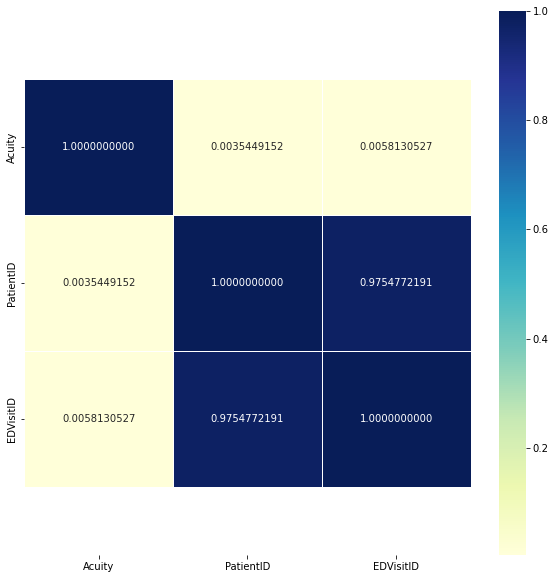

In [37]:
# columns shown here are selected by corr() since
# they are ideal for the plot

#import matplotlib.pyplot as plt
#%matplotlib inline
 
corr_matrix = dfed[['Acuity','PatientID','EDVisitID']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<div class="alert alert-block alert-info"><b>Question 18:</b> 
Add column 'Age' in Patient table.

In [142]:
dfpat_18 = dfpat.copy()

now = pd.Timestamp('now')  
dfpat_18['Age'] = (now - dfpat_18['DateOfBirth']).astype('<m8[Y]')
dfpat_18.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0


<div class="alert alert-block alert-info"><b>Question 19:</b> 
Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [50]:
# splitting dataframe with date and time as columns, where the values are from field discharge time
dfdisdate=pd.DataFrame().assign(datetime=dfreadr['DischargeDate'])
dfdisdate['date'] = pd.to_datetime(dfdisdate['datetime']).dt.date
dfdisdate['time'] = pd.to_datetime(dfdisdate['datetime']).dt.time
dfdisdate

,datetime,date,time
0,2018-01-04 19:59:31.391,2018-01-04,19:59:31.391000
1,2018-01-04 21:28:51.898,2018-01-04,21:28:51.898000
2,2018-01-04 22:28:23.672,2018-01-04,22:28:23.672000
3,2018-01-05 05:47:04.933,2018-01-05,05:47:04.933000
4,2018-01-05 14:18:30.029,2018-01-05,14:18:30.029000
...,...,...,...
715,2018-03-07 21:22:10.061,2018-03-07,21:22:10.061000
716,2018-03-08 02:43:18.749,2018-03-08,02:43:18.749000
717,2018-03-08 09:27:18.377,2018-03-08,09:27:18.377000
718,2018-03-10 06:06:12.068,2018-03-10,06:06:12.068000


<div class="alert alert-block alert-info"><b>Question 20:</b> 
Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [51]:
# Count of number of patients admitted based on Primary Diagnosis and Service provided.

dfreadr_cnt=dfreadr.groupby(['PrimaryDiagnosis','Service'])['PatientID'].count()
dfreadr_cnt


PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

<div class="alert alert-block alert-info"><b>Question 21:</b>  Which demographic patients are prone to get stroke?</div>

In [154]:
dfstroke = dfreadr[['PatientID','PrimaryDiagnosis']].loc[dfreadr['PrimaryDiagnosis'] == 'Stroke']
dfstroke.head()

,PatientID,PrimaryDiagnosis
8,10,Stroke
12,14,Stroke
18,19,Stroke
34,30,Stroke
40,35,Stroke


In [53]:
dfstroke_demo = pd.merge(dfstroke, dfpat, how="inner", on=["PatientID"])
dfstroke_demo

,PatientID,PrimaryDiagnosis,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,10,Stroke,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,53.0
1,14,Stroke,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish,52.0
2,19,Stroke,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,62.0
3,30,Stroke,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,36.0
4,35,Stroke,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56.0
...,...,...,...,...,...,...,...,...,...
63,601,Stroke,Aurelie,Lerner,1983-07-24 02:55:54.675,Male,Black/African-American,English,39.0
64,602,Stroke,Marjie,Walsh,1982-06-12 17:17:14.100,Male,Black/African-American,English,40.0
65,611,Stroke,Adolf,Ormes,1975-12-04 05:13:13.613,Male,Black/African-American,English,47.0
66,642,Stroke,Jerde,Endrizzi,1961-04-30 14:54:37.810,Female,Black/African-American,English,61.0


**Notes:**   
Sheet `ReAdmissionRegistry` and Sheet `Discharge` contain the same patients set. So we can use either one for merge with Sheet Patients

<div class="alert alert-block alert-info"><b>Question 22:</b>  Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.</div>

In [54]:
data_idx = {
        'Acuity': dfeduni['Acuity'],
        'EDDisposition': dfeduni['EDDisposition'],
        'Patient': dfeduni['PatientID']
}
df_idx = pd.DataFrame(data_idx).set_index(['Acuity','EDDisposition'])
df_idx.groupby(by = ['Acuity','EDDisposition']).count()

Patient
Acuity EDDisposition         
1      Admitted            29
       Discharged         398
2      Admitted           102
       Discharged          41
3      Admitted            70
4      Admitted            97
       Discharged          22
5      Admitted           162
       Discharged          24

<div class="alert alert-block alert-info"><b</b>  Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions)</div>

In [173]:
dfed_24 = {'ReasonForVisit': dfed['ReasonForVisit'],
        'EDDisposition': dfed['EDDisposition'],
        'Patient': dfed['PatientID']
}
dfed_24 = pd.DataFrame(dfed_24).set_index(['ReasonForVisit','EDDisposition'])
dfed_24 = dfed_24.groupby(by = ['ReasonForVisit','EDDisposition']).count()
dfed_24

Patient
ReasonForVisit      EDDisposition         
Accident            Admitted            39
Bleeding            Admitted            16
                    Discharged          15
Car Accident        Admitted            17
Chest Pain          Admitted            94
                    Discharged          15
Cough               Discharged           1
Fever               Admitted            46
                    Discharged         188
Gun Shot            Admitted            16
Intoxication        Discharged          30
Laceration          Discharged          30
Migraine            Admitted            47
                    Discharged         109
Pneumonia           Admitted           136
                    Discharged          65
Shortness of Breath Admitted            72
                    Discharged          77
Stomach Ache        Admitted            32
                    Discharged         154

In [174]:
dfed_unstack = dfed_24.unstack()
dfed_unstack

Patient           
EDDisposition       Admitted Discharged
ReasonForVisit                         
Accident                39.0        NaN
Bleeding                16.0       15.0
Car Accident            17.0        NaN
Chest Pain              94.0       15.0
Cough                    NaN        1.0
Fever                   46.0      188.0
Gun Shot                16.0        NaN
Intoxication             NaN       30.0
Laceration               NaN       30.0
Migraine                47.0      109.0
Pneumonia              136.0       65.0
Shortness of Breath     72.0       77.0
Stomach Ache            32.0      154.0

<div class="alert alert-block alert-info"><b>Question 25:</b>  Plot a graph by counting the no. of patients in each department</div>

In [176]:
pat_dept = dfabv.groupby(by = 'VisitDepartmentID').count().PatientMRN
pat_dept

VisitDepartmentID
1      51
2      51
3      51
4      51
5      92
6      92
7      93
8      93
9      79
10    100
11    102
12     95
Name: PatientMRN, dtype: int64

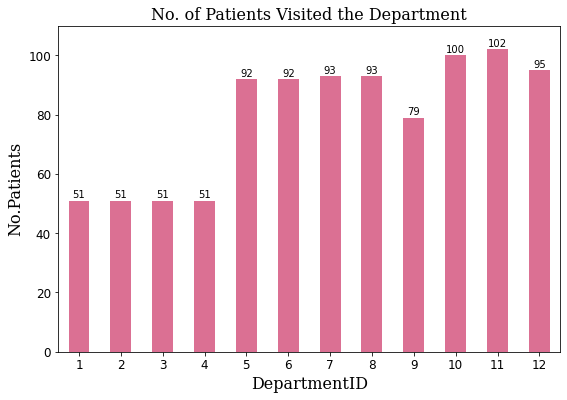

In [177]:
fig = plt.figure(1, figsize= (9, 6))

ax = pat_dept.plot(kind='bar', ylim=(0,110), color = 'palevioletred')
plt.title('No. of Patients Visited the Department',fontdict = font)
plt.xlabel('DepartmentID', fontdict = font)
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('No.Patients', fontdict = font)
plt.yticks(fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')   

plt.show()

<div class="alert alert-block alert-info"><b>Question 26:</b> 
Using arrays and loops, find the count of patients based on gender.

In [178]:
dfpat_26 = dfpat.copy()

malecount = 0
femalecount=0

for i in dfpat_26.index:
    if(dfpat_26['Gender'][i] == 'Male'):
        malecount += 1
    else:
        femalecount +=1
        
print('Total Male Patients: ', malecount) 
print('Total Male Patients: ',femalecount)

Total Male Patients:  537
Total Male Patients:  408


<div class="alert alert-block alert-info"><b>Question 27:</b> 
    Plot a graph to count the patients based on discharge disposition.

In [179]:
dfdis_27 = dfdis.groupby('DischargeDisposition')['PatientID'].count()
dfdis_27

DischargeDisposition
Expired     104
Home        577
Transfer     39
Name: PatientID, dtype: int64

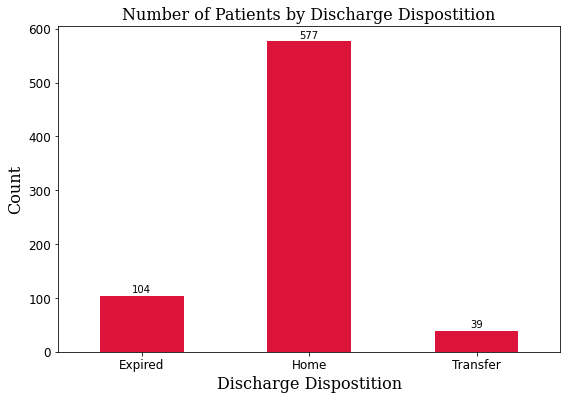

In [180]:
plt.figure(figsize=(9, 6))

ax = dfdis_27.plot(kind='bar', rot=0, color = 'crimson')
plt.title('Number of Patients by Discharge Dispostition', fontdict = font)
plt.xlabel('Discharge Dispostition', fontdict = font)
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Count', fontdict = font)
plt.yticks(fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

<div class="alert alert-block alert-info"><b>Question 28:</b> 
    Which reason of visit has maximum mortality rate.

In [41]:
p=dfdis['ExpectedMortality'].max()

dfdis['PrimaryDiagnosis'][dfdis['ExpectedMortality']==p]

88    Pneumonia
Name: PrimaryDiagnosis, dtype: object

<div class="alert alert-block alert-info"><b>Question 29:</b> 
     Calculate average LOS

In [41]:
dfreadr_29 = dfreadr.copy()

dfreadr_29['LOS'] = (dfreadr_29['DischargeDate'] - dfreadr_29['AdmissionDate']).dt.days
dfreadr_29['LOS'].mean()

9.534722222222221

<div class="alert alert-block alert-info"><b>Question 30:</b> 
    Which patient id has most entries in readmission registry.

In [31]:
dfreadr_30 = dfreadr.groupby(['PatientID']).size().reset_index(name='Count')
print(dfreadr_30)

     PatientID  Count
0            1      1
1            2      1
2            3      1
3            5      1
4            6      1
..         ...    ...
699        738      1
700        739      1
701        740      1
702        741      1
703        742      1

[704 rows x 2 columns]


In [32]:
dfreadr_30.loc[dfreadr_30['Count'] == dfreadr_30['Count'].max()]

,PatientID,Count
21,23,3


<div class="alert alert-block alert-info"><b>Question 31:</b> Find the count of White Spanish Male.</div>

In [33]:
dfpat_31 = dfpat[['Race', 'Language', 'Gender']].loc[(dfpat.Race == 'White') & (dfpat.Language == 'Spanish') & (dfpat.Gender == 'Male')]
dfpat_31

,Race,Language,Gender
10,White,Spanish,Male
11,White,Spanish,Male
12,White,Spanish,Male
13,White,Spanish,Male
14,White,Spanish,Male
15,White,Spanish,Male
16,White,Spanish,Male
17,White,Spanish,Male
18,White,Spanish,Male
19,White,Spanish,Male


<div class="alert alert-block alert-info"><b>Question 32:</b> If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [34]:
dfpat_32 = dfpat[['FirstName','LastName', 'Gender']]
dfpat_32

,FirstName,LastName,Gender
0,Lanni,Sue,Male
1,Far,Myers,Male
2,Devlin,Michael,Male
3,Carmine,Texas,Male
4,Tann,Bama,Male
...,...,...,...
940,Wat,Fideler,Male
941,Wandie,Baythrop,Male
942,Diahann,Smeeton,Male
943,Panchito,Sharple,Male


In [35]:
dfpat_32['Title'] = np.where(dfpat_32.Gender == 'Male','Mr. ' + dfpat_32.LastName, 'Mrs. '+ dfpat_32.LastName)
dfpat_32

/var/folders/xx/3f4nfwyx05dc5fq2btzrhj7h0000gn/T/ipykernel_96415/622727610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpat_32['Title'] = np.where(dfpat_32.Gender == 'Male','Mr. ' + dfpat_32.LastName, 'Mrs. '+ dfpat_32.LastName)


,FirstName,LastName,Gender,Title
0,Lanni,Sue,Male,Mr. Sue
1,Far,Myers,Male,Mr. Myers
2,Devlin,Michael,Male,Mr. Michael
3,Carmine,Texas,Male,Mr. Texas
4,Tann,Bama,Male,Mr. Bama
...,...,...,...,...
940,Wat,Fideler,Male,Mr. Fideler
941,Wandie,Baythrop,Male,Mr. Baythrop
942,Diahann,Smeeton,Male,Mr. Smeeton
943,Panchito,Sharple,Male,Mr. Sharple


<div class="alert alert-block alert-info"><b>Question 33:</b> Using a bar chart, which Service had the lowest count of Expected Mortality?

In [36]:
dfreadr_33 = dfreadr[['Service','ExpectedMortality']].groupby('Service').count().sort_values('ExpectedMortality')
dfreadr_33.columns = ['Count_ExpctedMortality']
dfreadr_33

,Count_ExpctedMortality
Service,
Orthopeadics,45
Neurology,65
Cardiology,95
Hospitalist,101
ICU,151
General Medicine,263


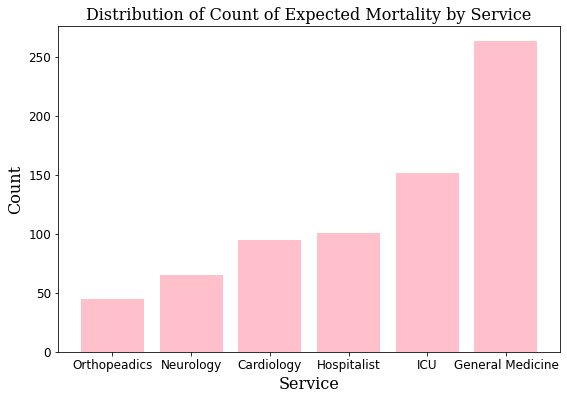

In [101]:
fig = plt.figure(figsize = (9, 6))

plt.bar(dfreadr_33.index, dfreadr_33.Count_ExpctedMortality, color = "pink")
plt.xlabel('Service', fontdict = font)
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Count', fontdict = font)
plt.yticks(fontsize = 12)
plt.title('Distribution of Count of Expected Mortality by Service', fontdict = font)

plt.show()

<div class="alert alert-block alert-info"><b>Question 36:</b> 
Create a correlation matrix on EDVisits.

In [42]:
dfed_36 = pd.DataFrame(dfed, columns=['Acuity','PatientID','EDVisitID'])

matrix = dfed_36.corr()
print('Correlation Matrix on EDVisits: ', '\n', matrix)

Correlation Matrix on EDVisits:  
              Acuity  PatientID  EDVisitID
Acuity     1.000000   0.003545   0.005813
PatientID  0.003545   1.000000   0.975477
EDVisitID  0.005813   0.975477   1.000000


**Note:**  
Columns are selected since they are ideal for the plot correlation matrix

<div class="alert alert-block alert-info"><b>Question 37:</b> 
Write a function to print all the upper case letter of a given sentence.

In [43]:
str_37 = input("Enter your sentence:")
str_37U = []

for a in str_37:   
  if (a.isupper()) == True:
     str_37U.append(a)

print('f''The sentence ', str_37, 'has uppercase letters:', str_37U)

Enter your sentence: Team NinjaMission learns a ton in PythonHackathon. Thanks for organizing!


The sentence has uppercase letters: ['T', 'N', 'M', 'P', 'H', 'T']


<div class="alert alert-block alert-info"><b>Question 38:</b> 
Number of patients on 'Transfer' based on primary diagnosis.

In [44]:
dfreadr_38 = dfreadr.loc[dfreadr['DischargeDisposition'] == 'Transfer']
dfreadr_38.groupby(['PrimaryDiagnosis'])['PatientID'].count()

PrimaryDiagnosis
Afib                1
Diabetes            7
Flu                 2
Heart Failure       9
Knee Replacement    1
Laceration          1
Pain                1
Pneumonia           8
Stroke              9
Name: PatientID, dtype: int64

<div class="alert alert-block alert-info"><b>Question 39:</b> 
 Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [45]:
dfeduni_id = dfeduni[['PatientID']].loc[dfeduni['ReasonForVisit'] == 'Migraine']
dfpat_39 = dfpat[['PatientID','FirstName', 'LastName','DateOfBirth']].merge(dfeduni_id, how="inner", on=["PatientID"])
dfpat_39

,PatientID,FirstName,LastName,DateOfBirth
0,2,Far,Myers,1985-11-15 02:08:42.090
1,3,Devlin,Michael,1976-04-15 02:52:09.762
2,12,Zonnya,Ab,1963-05-23 10:04:33.074
3,14,Gan,Yu,1970-06-02 06:22:54.675
4,22,Joesph,Long,1979-12-04 16:45:56.080
...,...,...,...,...
111,897,Barrows,Coupland,1979-10-31 18:28:35.483
112,908,Knox,Group,1975-08-25 22:27:50.177
113,910,Kuvalis,Coupland,1986-05-23 19:23:27.752
114,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178


<div class="alert alert-block alert-info"><b>Question 40:</b> 
Plot a graph showing the count of patients for the reason visited the hospital.

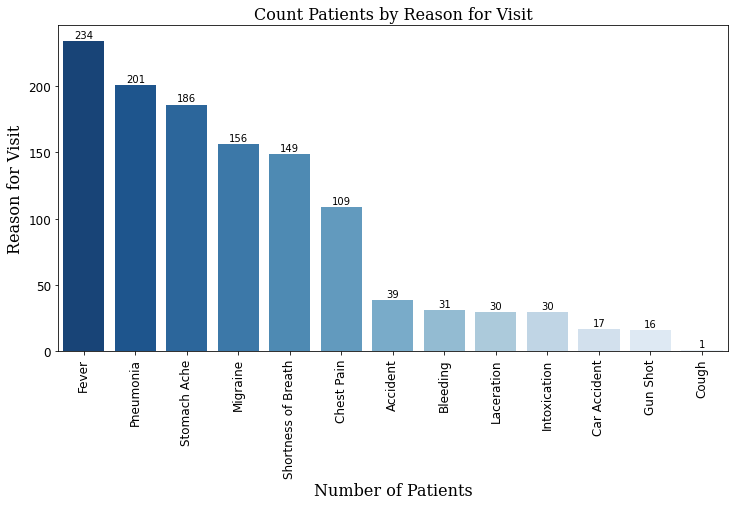

In [100]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x ='ReasonForVisit',data = dfed,palette='Blues_r', order = dfed['ReasonForVisit'].value_counts().index)
plt.title('Count Patients by Reason for Visit', fontdict = font)
plt.xlabel('Number of Patients', fontdict = font)
plt.ylabel('Reason for Visit', fontdict = font)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)

# Add Annotation
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')   

plt.show()

<div class="alert alert-block alert-info"><b>Question 41:</b>  Find the visit type with maximum 'No Show'</div>

In [181]:
dfabv_41 = dfabv[['VisitType','VisitStatus']].loc[dfabv['VisitStatus'] == 'No Show'].groupby('VisitType').count().sort_values('VisitStatus', ascending = False)
dfabv_41.rename(columns = {'VisitStatus': 'Count of No-Show Patients'})

,Count of No-Show Patients
VisitType,
Telemedicine,74
Follow Up,41
Physical,39


In [182]:
dfabv_41.idxmax()

VisitStatus    Telemedicine
dtype: object

<div class="alert alert-block alert-info"><b>Question 42:</b>  Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery</div>

In [ ]:
dfpro_42 = dfpro[10:19].loc[(dfpro['ProviderSpecialty'] == 'Surgery')]
dfpro_42

<div class="alert alert-block alert-info"><b>Question 43:</b>  In question 34, when the value is less than 6, print as -1,else print 99</div>

In [ ]:
array_43 = np.arange(1,31).reshape(6,5)
array_43

In [ ]:
array_43[array_43 < 6] = -1
array_43[array_43 >= 6] = 99
print(array_43)

<div class="alert alert-block alert-info"><b>Question 44:</b>  Create a pivot table displaying average LOS based on Service and Primary Diagnosis</div>

In [193]:
dfreadr_44 = pd.DataFrame()
dfreadr_44['Service'] = dfreadr.Service
dfreadr_44['PrimaryDiagnosis'] = dfreadr.PrimaryDiagnosis
dfreadr_44['LOS'] = (dfreadr['DischargeDate'] - dfreadr['AdmissionDate']).dt.days

In [194]:
df44_pivot = pd.pivot_table(dfreadr_44, values = 'LOS', index = ['Service','PrimaryDiagnosis'], aggfunc = np.mean).astype('int')
df44_pivot

LOS
Service          PrimaryDiagnosis       
Cardiology       AMI                  10
                 Afib                 11
                 Broken Leg           10
                 Flu                  12
                 Heart Failure         9
                 Kidney Failure        4
General Medicine Broken Leg           13
                 Diabetes             10
                 Fever                 8
                 Flu                   9
                 Hypertension          8
                 Kidney Failure       10
                 Laceration            9
                 Pneumonia             9
                 Stroke               11
Hospitalist      AMI                  10
                 Broken Leg            7
                 Diabetes              8
                 Fever                10
                 Flu                   8
                 Hypertension         10
                 Kidney Failure       10
                 Knee Replacement      6
                 Laceration            9
                 Pneumonia             8
                 Stroke               16
ICU              AMI                  12
                 Afib                  6
                 Fever                13
                 Flu                   8
                 Heart Failure         9
                 Hypertension          8
                 Kidney Failure       11
                 Laceration           15
                 Pneumonia             8
                 Spinal Cord Injury   10
                 Stroke               10
Neurology        AMI                   9
                 Flu                   7
                 Heart Failure        13
                 Hypertension          9
                 Migraine              8
                 Pain                 10
                 Pneumonia             9
                 Stroke                9
Orthopeadics     Hip Fracture          9
                 Knee Replacement      9

<div class="alert alert-block alert-info"><b>Question 45:</b>  Calculate mortality by diagnosis</div>

In [202]:
dfdis_45count = dfdis[['DischargeDisposition', 'PrimaryDiagnosis']].loc[dfdis.DischargeDisposition == 'Expired'].groupby('PrimaryDiagnosis').count()
dfdis_45count = dfdis_45count.rename(columns = {'DischargeDisposition': 'Count'})
dfdis_45count

,Count
PrimaryDiagnosis,
AMI,6
Afib,4
Broken Leg,3
Diabetes,9
Fever,4
Flu,11
Heart Failure,16
Hip Fracture,3
Hypertension,16


In [204]:
count_45 = len(dfdis)
dfdis_45 = dfdis_45count/count_45
dfdis_45 = dfdis_45.rename(columns = {'Count': 'ObeservedMortality'})
dfdis_45

,ObeservedMortality
PrimaryDiagnosis,
AMI,0.008333
Afib,0.005556
Broken Leg,0.004167
Diabetes,0.012500
Fever,0.005556
Flu,0.015278
Heart Failure,0.022222
Hip Fracture,0.004167
Hypertension,0.022222


<div class="alert alert-block alert-info"><b>Question 47:</b> 
    Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [205]:
dfabv.iloc[dfabv[dfabv['BloodPressureSystolic']==dfabv['BloodPressureSystolic'].max()].index]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


<div class="alert alert-block alert-info"><b>Question 48:</b> 
    Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [206]:
dfreadr_48 = dfreadr.groupby(['Service','DischargeDisposition'])['ExpectedLOS'].mean().reset_index()
dfreadr_48

,Service,DischargeDisposition,ExpectedLOS
0,Cardiology,Expired,9.202626
1,Cardiology,Home,12.864936
2,Cardiology,Transfer,11.818403
3,General Medicine,Expired,5.874003
4,General Medicine,Home,6.105696
5,General Medicine,Transfer,6.116124
6,Hospitalist,Expired,6.775636
7,Hospitalist,Home,8.009046
8,Hospitalist,Transfer,5.701389
9,ICU,Expired,9.919063


**Note:**  
Flatten hierarchical columns for dataframe: `get_level_values(0)` and `to_flat_index()` 
flatten the multiple indexes: `reset_index()`

<div class="alert alert-block alert-info"><b>Question 49:</b> 
    Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [ ]:
len(dfabv[(dfabv['BloodPressureSystolic']>180 )& (dfabv['BloodPressureDiastolic']>120)])

<div class="alert alert-block alert-info"><b>Question 50:</b> 
    Which departmentID has maximum number of visits scheduled.

In [47]:
df_50 = dfabv.groupby(['VisitDepartmentID'])['DateScheduled'].count().sort_values(ascending=False).reset_index(name='Count')
df_50

,VisitDepartmentID,Count
0,11,102
1,10,100
2,12,95
3,7,93
4,8,93
5,5,92
6,6,92
7,9,79
8,1,51
9,2,51


In [48]:
print('Department',df_50['VisitDepartmentID'].loc[df_50['Count'].idxmax()], 'has maximum number of visits scheduled')

Department 11 has maximum number of visits scheduled


<div class="alert alert-block alert-info"><b>Question 51:</b> Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [49]:
dfed_51 = dfed[['PatientID', 'ReasonForVisit', 'Acuity']].loc[((dfed['ReasonForVisit'] == 'Migraine') | (dfed['ReasonForVisit'] == 'Pneumonia')) & (dfed['Acuity'] >= 2)]
dfed_51

,PatientID,ReasonForVisit,Acuity
1,12,Migraine,2
3,14,Migraine,3
11,29,Pneumonia,2
12,30,Pneumonia,3
13,31,Pneumonia,4
...,...,...,...
1107,773,Migraine,2
1150,850,Migraine,2
1152,852,Migraine,2
1160,868,Migraine,2


In [50]:
dfpat_51 = dfpat.merge(dfed_51, how = 'inner')
dfpat_51

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,ReasonForVisit,Acuity
0,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Migraine,3
1,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,Migraine,2
2,8,Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English,Migraine,2
3,10,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,Migraine,2
4,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish,Migraine,2
...,...,...,...,...,...,...,...,...,...
210,913,Alta,McGrath,1973-02-09 04:11:58.220,Female,Black/African-American,English,Pneumonia,4
211,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Female,Black/African-American,English,Migraine,3
212,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,Pneumonia,4
213,917,Velvet,Bushnell,1965-11-13 07:26:58.889,Female,Black/African-American,English,Pneumonia,2


<div class="alert alert-block alert-info"><b>Question 52:</b> Retrieve the row with minimum DBP using sorting technique

In [51]:
dfabv_15 = dfabv.copy()
dfabv_15.sort_values('BloodPressureDiastolic', ascending = True).head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


**Note:**  
This question can also be solved by loc[] with condition:      
`dfabv.loc[dfabv.BloodPressureDiastolic == dfabv.BloodPressureDiastolic.min()]`

<div class="alert alert-block alert-info"><b>Question 53:</b> Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [54]:
ReasonForVisit = input("Reason for Visit? ")
print("The number of patients who visited for",ReasonForVisit, 'is', dfed['PatientID'][dfed['ReasonForVisit'] == ReasonForVisit].count())

Reason for Visit?  Fever


The number of patients who visited for Fever is 234


<div class="alert alert-block alert-info"><b>Question 54:</b> Mortality O:E

In [55]:
# Calculate the Observed Mortality Rate
no_expired = dfreadr.loc[dfreadr.DischargeDisposition == 'Expired']['PatientID'].count()
no_patient = len(dfreadr.index)
ObMortality = no_expired/no_patient
ObMortality

0.14444444444444443

In [56]:
# Calculate the Average Expected Mortality Rate
ExpMortality = dfreadr.ExpectedMortality.mean()
ExpMortality

0.3380628739560978

In [57]:
MortalityOE = ObMortality/ExpMortality
MortalityOE 

0.4272709474250123

<div class="alert alert-block alert-info"><b>Question 55:</b> Create a bar chart on service & expected length of stay.

In [59]:
dfreadr_55 = dfreadr[['Service', 'ExpectedLOS']].groupby('Service').mean().reset_index()
dfreadr_55

,Service,ExpectedLOS
0,Cardiology,12.231596
1,General Medicine,6.090473
2,Hospitalist,7.818382
3,ICU,12.656630
4,Neurology,11.195596
5,Orthopeadics,3.586373


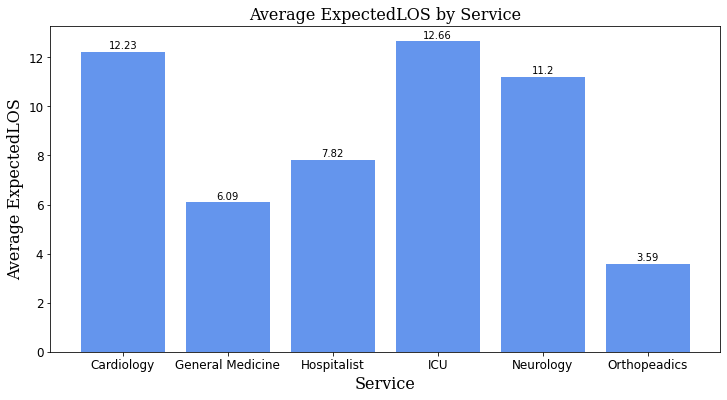

In [97]:
fig, ax = plt.subplots(figsize = (12,6))

plt.bar(dfreadr_55.Service, dfreadr_55.ExpectedLOS, color = "cornflowerblue")
plt.xlabel('Service', fontdict = font)
plt.xticks(rotation = 0)
plt.ylabel('Average ExpectedLOS', fontdict = font)
plt.title('Average ExpectedLOS by Service', fontdict = font)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

# Add Annotation
for rect in ax.patches:
    y_value = rect.get_height().round(2)
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')   

    
plt.show()

**Note:**  
Same as Ques8. We can not directly pull columns dfreadr.Service, dfreadr.ExpectedLOS as y-value is not explainable that way. 

<div class="alert alert-block alert-info"><b>Question 56:</b> 
Count of canceled status.

In [62]:
count_56 = len(dfabv[dfabv['VisitStatus'] == 'Canceled'])

print("Number of patients whose visit status are canceled: ",count_56)

Number of patients whose visit status are canceled:  60


<div class="alert alert-block alert-info"><b>Question 57:</b> Find the age prone to get stroke.

**Interpret1: Find the age range that has the largest count to get stroke**

In [225]:
dfreadr_57 = dfreadr[['PatientID', 'PrimaryDiagnosis']].loc[dfreadr.PrimaryDiagnosis == 'Stroke']
dfreadr_57

,PatientID,PrimaryDiagnosis
8,10,Stroke
12,14,Stroke
18,19,Stroke
34,30,Stroke
40,35,Stroke
...,...,...
581,601,Stroke
582,602,Stroke
591,611,Stroke
622,642,Stroke


In [229]:
dfpat_57 = pd.DataFrame(dfpat.PatientID)

now = pd.Timestamp('now')
dfpat_57['Age'] = (now - dfpat['DateOfBirth']).astype('<m8[Y]')
dfpat_57.sort_values('Age')

,PatientID,Age
201,202,35.0
53,55,35.0
902,903,35.0
689,690,35.0
871,872,35.0
...,...,...
443,444,62.0
341,342,62.0
640,641,62.0
79,81,63.0


In [244]:
df_57_1 = dfpat_57.merge(dfreadr_57, how = 'inner')[['Age','PrimaryDiagnosis']]
df_57_1['AgeRange'] = pd.cut(x=df_57_1['Age'], bins=[35, 45, 55, 65])
df_57_1

,Age,PrimaryDiagnosis,AgeRange
0,53.0,Stroke,"(45, 55]"
1,52.0,Stroke,"(45, 55]"
2,62.0,Stroke,"(55, 65]"
3,36.0,Stroke,"(35, 45]"
4,56.0,Stroke,"(55, 65]"
...,...,...,...
63,39.0,Stroke,"(35, 45]"
64,40.0,Stroke,"(35, 45]"
65,47.0,Stroke,"(45, 55]"
66,61.0,Stroke,"(55, 65]"


In [245]:
dfage_57_1 = df_57_1.groupby('AgeRange')['PrimaryDiagnosis'].count().sort_values(ascending = False)
dfage_57_1

AgeRange
(45, 55]    24
(35, 45]    23
(55, 65]    21
Name: PrimaryDiagnosis, dtype: int64

In [246]:
print('Age Range in', dfage_57_1.index[0],'prone to get stroke')

Age Range in (45, 55] prone to get stroke


**Interpret2: Find the largest age count that get stroke**

In [254]:
df_57_2 = dfpat_57.merge(dfreadr_57, how = 'inner')[['Age','PrimaryDiagnosis']].groupby('Age').count().sort_values('PrimaryDiagnosis', ascending = False)
df_57_2 = df_57_2.loc[df_57_2.PrimaryDiagnosis == df_57_2.PrimaryDiagnosis.max()]
df_57_2

,PrimaryDiagnosis
Age,
58.0,6
61.0,6


In [263]:
print('Age',df_57_2.index.tolist(),'prone to get stroke')

Age [58.0, 61.0] prone to get stroke


<div class="alert alert-block alert-info"><b>Question 58:</b> 
Display total count of patients service wise based on gender.

In [67]:
dfreadr_58 = dfreadr[['PatientID', 'Service']]
dfpat_58 = dfpat[['PatientID', 'Gender']]
df_58 = dfpat_58.merge(dfreadr_58, how = 'inner').groupby(['Service','Gender']).count().rename(columns = {'PatientID':'Count'})
df_58

Count
Service          Gender       
Cardiology       Female     41
                 Male       54
General Medicine Female    114
                 Male      149
Hospitalist      Female     35
                 Male       66
ICU              Female     65
                 Male       86
Neurology        Female     34
                 Male       31
Orthopeadics     Female     22
                 Male       23

<div class="alert alert-block alert-info"><b>Question 59:</b> 
Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [71]:
dfpro_59 = pd.DataFrame(dfpro['ProviderName'])
dfpro_59["FirstName"] = dfpro['ProviderName'].apply(lambda x: x[x.find(" ")+1:])
dfpro_59["LastName"] = dfpro["ProviderName"].apply(lambda x: x[0:x.find(" ")])
dfpro_59.head(10)

,ProviderName,FirstName,LastName
0,Sally Sue,Sue,Sally
1,Mike Myers,Myers,Mike
2,Jordan Michael,Michael,Jordan
3,Ted Texas,Texas,Ted
4,Ala Bama,Bama,Ala
5,Harry Kane,Kane,Harry
6,Barry Bar,Bar,Barry
7,Ted Green,Green,Ted
8,Ted Black,Black,Ted
9,Fred Man,Man,Fred


**Note:**  
Use head() to show the first 10 lines to save space

<div class="alert alert-block alert-info"><b>Question 60:</b> 
Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [ ]:
ELOS_user = int(input("Enter the expected LOS you think: "))
print(ELOS_user)

In [ ]:
dfreadr_60 = dfreadr[['PatientID','ExpectedLOS']].loc[dfreadr.ExpectedLOS > ELOS_user]
dfpat_60 = dfpat.merge(dfreadr_60, how='inner')
dfpat_60 [['FirstName','LastName','ExpectedLOS']]

<div class="alert alert-block alert-info"><b>Question 61:</b>  Plot a graph by multiplotting on the same canvas  (Take any set of x & y values)</div>

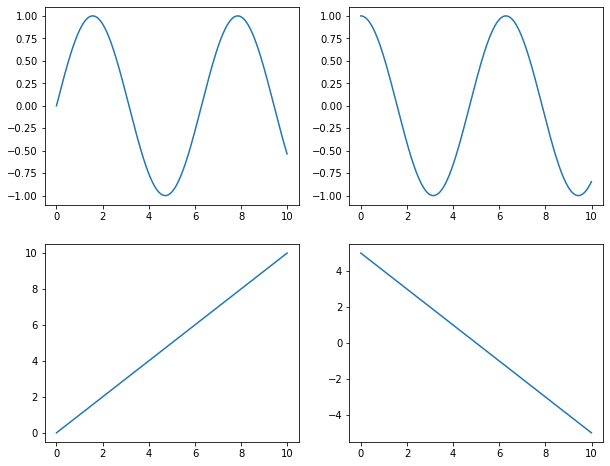

In [207]:
x_61 = np.arange(0, 10, 0.01)
y1_61 = np.sin(x_61)
y2_61 = np.cos(x_61)
y3_61 = x_61
y4_61 = 5 - x_61

fig = plt.figure(1, figsize= (10, 8))

plt.subplot(2,2,1)
plt.plot(x_61, y1_61)

plt.subplot(2,2,2)
plt.plot(x_61, y2_61)

plt.subplot(2,2,3)
plt.plot(x_61, y3_61)

plt.subplot(2,2,4)
plt.plot(x_61, y4_61)

plt.show()

<div class="alert alert-block alert-info"><b>Question 62:</b>  Display the data for all 'White Female' patients above the age of 50  (Take any set of x & y values)</div>

In [208]:
dfpat_62 = dfpat.copy()

now = pd.Timestamp('now')
dfpat_62['Age'] = (now - dfpat['DateOfBirth']).astype('<m8[Y]')

In [209]:
dfpat_62_display = dfpat_62.loc[(dfpat_62['Race']=='White') & (dfpat_62['Gender']=='Female') & (dfpat_62['Age'] > 50)][['Language','Age']]
dfpat_62_display

,Language,Age
28,Spanish,55.0
30,Spanish,62.0
33,Spanish,62.0
34,Spanish,56.0
39,Spanish,51.0
...,...,...
865,English,52.0
866,English,55.0
867,English,53.0
869,English,59.0


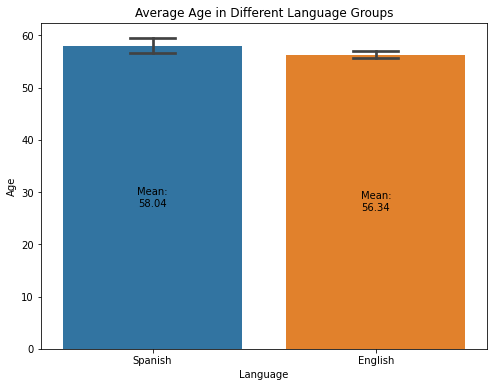

In [210]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(data = dfpat_62_display, x = 'Language', y = 'Age', capsize=0.2, ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax.set(title = 'Average Age in Different Language Groups')
plt.show()

<div class="alert alert-block alert-info"><b>Question 65:</b>  Get the  number of patients based on service and primary diagnosis.

In [88]:
dfreadr_65 = dfreadr[['PatientID', 'Service', 'PrimaryDiagnosis']]
dfreadr_65 = dfreadr_65.groupby(['Service', 'PrimaryDiagnosis']).count()
dfreadr_65.columns = ['Count of Patients']
dfreadr_65

Count of Patients
Service          PrimaryDiagnosis                     
Cardiology       AMI                                40
                 Afib                               10
                 Broken Leg                          3
                 Flu                                 2
                 Heart Failure                      39
                 Kidney Failure                      1
General Medicine Broken Leg                          3
                 Diabetes                           38
                 Fever                              13
                 Flu                                54
                 Hypertension                       35
                 Kidney Failure                     12
                 Laceration                         21
                 Pneumonia                          67
                 Stroke                             20
Hospitalist      AMI                                 1
                 Broken Leg                          3
                 Diabetes                           26
                 Fever                               3
                 Flu                                19
                 Hypertension                        6
                 Kidney Failure                      6
                 Knee Replacement                    1
                 Laceration                          7
                 Pneumonia                          28
                 Stroke                              1
ICU              AMI                                 5
                 Afib                                1
                 Fever                               3
                 Flu                                 3
                 Heart Failure                      33
                 Hypertension                        4
                 Kidney Failure                      1
                 Laceration                          1
                 Pneumonia                          77
                 Spinal Cord Injury                  2
                 Stroke                             21
Neurology        AMI                                 2
                 Flu                                 2
                 Heart Failure                       6
                 Hypertension                        5
                 Migraine                           12
                 Pain                                7
                 Pneumonia                           5
                 Stroke                             26
Orthopeadics     Hip Fracture                       23
                 Knee Replacement                   22

<div class="alert alert-block alert-info"><b>Question 66:</b> 
np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

In [89]:
array_66 = np.arange(1,31).reshape(6,5)
array_66[[0,4,5]][:,[3,4]]

array([[ 4,  5],
       [24, 25],
       [29, 30]])

<div class="alert alert-block alert-info"><b>Question 67:</b> Make a pivot table by the no. of patients from the admission date till discharge date.

In [215]:
dfreadr_67 = pd.DataFrame({'PatientID': dfreadr.PatientID,
                           'AdmissionDate': dfreadr.AdmissionDate,
                           'DischargeDate': dfreadr.DischargeDate})

In [216]:
df67_pivot = pd.pivot_table(dfreadr_67, values = 'PatientID', index = ['AdmissionDate','DischargeDate'], aggfunc = 'count').rename(columns={'PatientID': 'Count of Patients'})
df67_pivot

Count of Patients
AdmissionDate DischargeDate                             
2018-01-01    2018-01-04 19:59:31.391                  1
              2018-01-04 21:28:51.898                  1
              2018-01-04 22:28:23.672                  1
              2018-01-05 05:47:04.933                  1
              2018-01-05 14:18:30.029                  1
...                                                  ...
2018-02-22    2018-03-07 21:22:10.061                  1
              2018-03-08 02:43:18.749                  1
              2018-03-08 09:27:18.377                  1
              2018-03-10 06:06:12.068                  1
              2018-03-10 20:38:30.568                  1

[720 rows x 1 columns]

<div class="alert alert-block alert-info"><b>Question 68:</b> :Display the data where actual LOS is greater than expected LOS.

In [217]:
dfreadr_68 = dfreadr.copy()
dfreadr_68.insert(7, 'ActualLOS', (dfreadr_68['DischargeDate'] - dfreadr_68['AdmissionDate'])/np.timedelta64(1,'D'))
dfreadr_68[(dfreadr_68['ActualLOS'] > dfreadr_68['ExpectedLOS'])]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ActualLOS,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.895045,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.936385,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,4.241029,3.763352,0.307527,1.0,4.0,1.0
10,568,12,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,8.390131,7.162811,0.671473,1.0,5.0,1.0
11,107,13,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,8.899103,4.554479,0.266584,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.890394,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,14.113411,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,14.393963,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,16.254306,3.123064,0.655870,NaN,NaN,NaN


<div class="alert alert-block alert-info"><b>Question 69:</b> Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [218]:
## optimize 
dfpat_69m = dfpat.copy()

dfpat_69m['mask'] = (dfpat_69m['FirstName'].str.contains('lau'))|(dfpat_69m['LastName'].str.contains('lau'))|(dfpat_69m['FirstName'].str.contains('Lau'))|(dfpat_69m['LastName'].str.contains('Lau'))
dfpat_69 = dfpat_69m[dfpat_69m['mask']==True]
dfpat_69.drop(columns=['mask'])

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


<div class="alert alert-block alert-info"><b>Question 70:</b> Plot a graph to show the distribution of expected mortality.

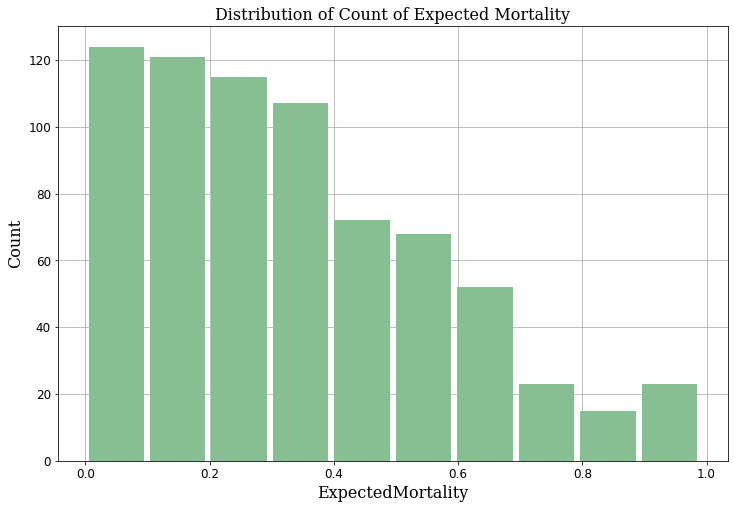

In [219]:
dfreadr.hist(column="ExpectedMortality",figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

plt.title('Distribution of Count of Expected Mortality', fontdict = font)
plt.xlabel('ExpectedMortality', fontdict = font)
plt.xticks(fontsize = 12)
plt.ylabel('Count', fontdict = font)
plt.yticks(fontsize = 12)

plt.show()

<div class="alert alert-block alert-info"><b>Question 71:</b> Create a visualization on the count of patients based on primary diagnosis.

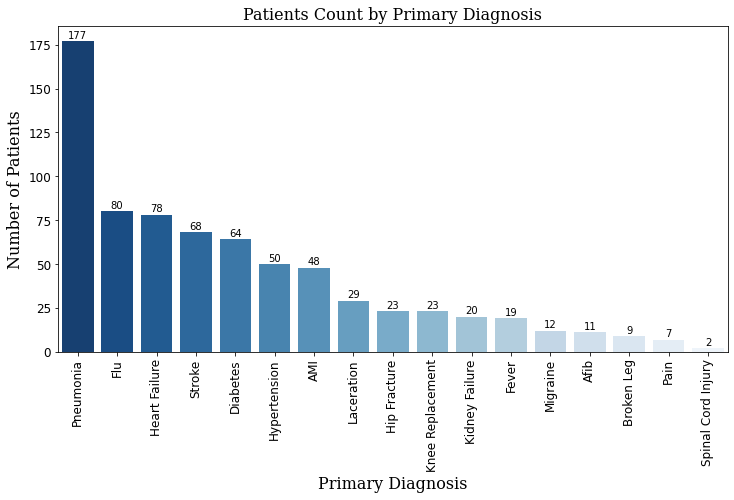

In [90]:
fig, ax = plt.subplots(figsize = (12,6))

sns.countplot(x ='PrimaryDiagnosis',data = dfreadr, palette = 'Blues_r', order = dfreadr['PrimaryDiagnosis'].value_counts().index)
plt.title('Patients Count by Primary Diagnosis', fontdict = font)
plt.xlabel('Primary Diagnosis', fontdict = font)
plt.ylabel('Number of Patients', fontdict = font)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)

# Add Annotation
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')   
    
plt.show()

<div class="alert alert-block alert-info"><b>Question 72:</b> List male patients over the age of 60 who have undergone surgery from January-March 2019</div>

In [ ]:
# Sheets: dfpat, dfabv, dfpro
# Step one: Find out the patients who saw providers whose df.pro ['ProviderSpecialty'] == 'Surgery'
dfpro_72m = dfabv.merge(dfpro, how = 'inner')[['ProviderID','ProviderName','ProviderSpecialty','PatientMRN','DateofVisit']]
dfpro_72 = dfpro_72m.loc[dfpro_72m.ProviderSpecialty == 'Surgery']
dfpro_72

In [ ]:
# Step two: Find out the patients who saw the providers above whose Age >=60, Gender = 'male', DateofVisit in '2019-01-01' - '2019-03-31'
dfpat_72m = dfpat.merge(dfpro_72, how = 'inner', left_on = 'PatientID', right_on = 'PatientMRN') \
            [['PatientID','FirstName','LastName','DateOfBirth','Gender','ProviderID','ProviderSpecialty','DateofVisit']]
dfpat_72m

In [ ]:
# Prepare "Age" condition
start_date = '2019-01-01'
end_date = '2019-03-31'

# Calculate Age
now = pd.Timestamp('now')
dfpat_72m['DateOfBirth'] = pd.to_datetime(dfpat_72m['DateOfBirth'], format='%m%d%y')    
dfpat_72m['Age'] = (now - dfpat_72m['DateOfBirth']).astype('<m8[Y]')
dfpat_72m

In [ ]:
dfpat_72 = dfpat_72m.loc[(dfpat_72m.Gender == 'Male') & (dfpat_72m.Age >= 60) & (dfpat_72m.DateofVisit >= start_date) & (dfpat_72m.DateofVisit <= end_date)] \
            [['PatientID','FirstName','LastName','Age','Gender','ProviderID','ProviderSpecialty','DateofVisit']]
dfpat_72

**Notes:**
1. Patients['PatientID'] contains all identical patients ID that will show in the rest of sheets, which values from 1 to 945
2. AmbulatoryVisits['PatientMRN'] values from 4 to 917. The sum of ambulatory visits is 950. Because some patients took multiple ambulatory visits, there are duplicated values

<div class="alert alert-block alert-info"><b>Question 73:</b> Delete the column 'DischargeDispostion' iteratively.

In [220]:
dfreadr_73 = dfreadr.copy()
dfdis_73 = dfdis.copy()

print('The Original Columns in Sheet ReAdmissionRegistry:',list(dfreadr_73.columns), '\n\nThe Original Columns in Sheet Discharges:', list(dfdis_73.columns))

The Original Columns in Sheet ReAdmissionRegistry: ['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate', 'DischargeDisposition', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS', 'ExpectedMortality', 'ReadmissionFlag', 'DaysToReadmission', 'EDVisitAfterDischargeFlag'] 

The Original Columns in Sheet Discharges: ['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate', 'DischargeDisposition', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS', 'ExpectedMortality']


In [221]:
list_73 = [dfreadr_73, dfdis_73]

for df in list_73:
    df.drop(columns = ['DischargeDisposition'], inplace= True)
    
print('The Columns in sheet ReAdmissionRegistry:',list(dfreadr_73.columns), '\n\nThe Columns in Sheet Discharges:', list(dfdis_73.columns))

The Columns in sheet ReAdmissionRegistry: ['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS', 'ExpectedMortality', 'ReadmissionFlag', 'DaysToReadmission', 'EDVisitAfterDischargeFlag'] 

The Columns in Sheet Discharges: ['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS', 'ExpectedMortality']


<div class="alert alert-block alert-info"><b>Question 74:</b> Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)</div>

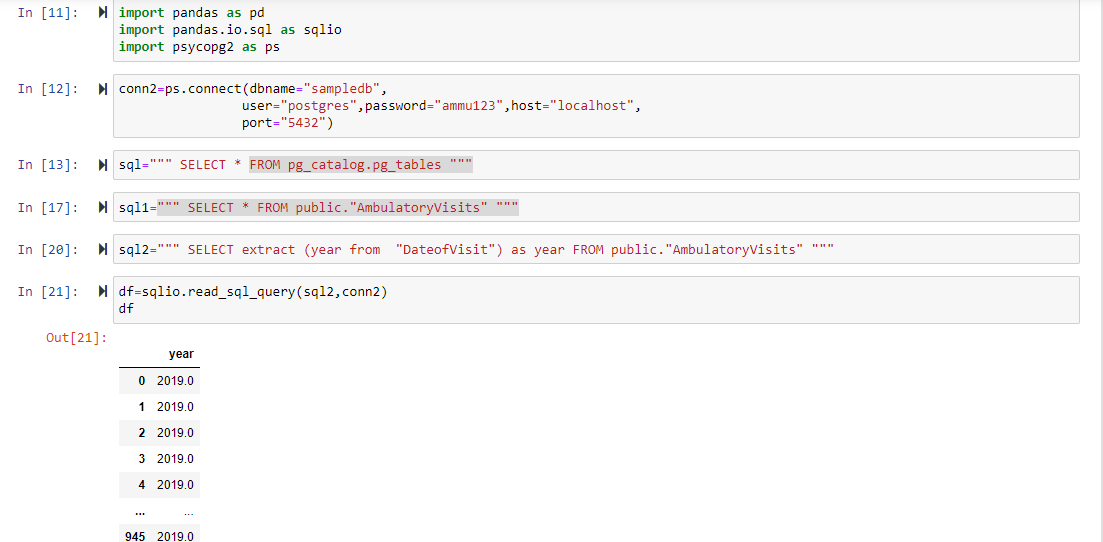

In [61]:
from IPython import display
display.Image('./74.png')

<div class="alert alert-block alert-info"><b>Question 75:</b>Calculate the time spent in ED Department for each visit

In [224]:
dfed_75 = dfed[['EDVisitID','PatientID']]
dfed_75['VisitTime(Hours)'] = ((dfed['EDDischargeTime'] - dfed['VisitDate']).dt.total_seconds()/3600).astype(int)
dfed_75

,EDVisitID,PatientID,VisitTime(Hours)
0,1,1,11
1,12,12,23
2,13,13,1
3,14,14,1
4,15,15,2
...,...,...,...
1194,1183,929,15
1195,1186,932,22
1196,1187,933,4
1197,1188,934,6


<div class="alert alert-block alert-info"><b>Question 76:</b>Find the last name of the patients, by getting the first name from the user.

In [102]:
import re
regex = input("Enter the First Name: ")
dfpat['LastName'][dfpat.FirstName.str.match(regex)]

Enter the First Name:  Far


1        Myers
15      Pardon
95    Rudinger
Name: LastName, dtype: object

<div class="alert alert-block alert-info"><b>Question 77:</b>  Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.</div>

In [ ]:
list_78a = dfeduni.Acuity.unique()
list_78a

In [ ]:
# part1: no. of admitted patient in Acuity[1,2,3,4,5]
list_78e1 = []

for i in list_78a:
    no_78e1 = dfeduni.loc[(dfeduni.Acuity == i) & (dfeduni.EDDisposition == 'Admitted')].shape[0]
    list_78e1.append(no_78e1)

list_78e1

In [ ]:
# part2: no. of discharged patient in Acuity[1,2,3,4,5]
list_78e2 = []

for i in list_78a:
    no_78e2 = dfeduni.loc[(dfeduni.Acuity == i) & (dfeduni.EDDisposition == 'Discharged')].shape[0]
    list_78e2.append(no_78e2)

list_78e2

In [ ]:
fig, ax = plt.subplots()

ax.bar(list_78a, list_78e1, edgecolor='black', hatch="/", label = 'Admitted')
ax.bar(list_78a, list_78e2, bottom=list_78e1, edgecolor='black', hatch='//', label = 'Discharged')
ax.legend()

plt.show()

<div class="alert alert-block alert-info"><b>Question 78:</b>Find reasonForVisit with highest count of acuity 5 patients. 

In [58]:
df78 = pd.DataFrame()
df78['Count Acuity Level5'] = dfed.loc[dfed.Acuity == 5].groupby('ReasonForVisit').count().sort_values(by = 'Acuity', ascending = False).Acuity
df78

,Count Acuity Level5
ReasonForVisit,
Chest Pain,61
Shortness of Breath,46
Accident,39
Car Accident,16
Fever,16
Gun Shot,16
Pneumonia,15


In [ ]:
df78.loc[df78['Count Acuity Level5'].idxmax()]

<div class="alert alert-block alert-info"><b>Question 79:</b>Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS? 

In [222]:
df79 = pd.DataFrame()
df79['MaxExpLOS and MinExpLOS Diff'] = dfdis.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp).sort_values(ascending = False)
df79

,MaxExpLOS and MinExpLOS Diff
PrimaryDiagnosis,
Pneumonia,14.834260
Stroke,12.623497
Flu,8.876980
Laceration,8.805804
Diabetes,8.773368
Kidney Failure,8.423559
Hypertension,8.025063
Fever,7.966867
Heart Failure,7.695024


In [223]:
print(df79['MaxExpLOS and MinExpLOS Diff'].idxmax(), 'has the biggest difference between Max and Min ExpectedLOS')

Pneumonia has the biggest difference between Max and Min ExpectedLOS


**Note:**  
`['Primary Diagnosis']` and `['ExpectedLOS']` present in both `ReAdmissionRegistry` and `Discharges` sheets.When comparing data in both sheets with `describe()`, we found they are the the same for these two columns. We may use either one.    
We use sheet `Discharges` (`dfdis`) to solve this problem. 

<div class="alert alert-block alert-info"><b>Question 80:</b> Write a code snippet to print different ProviderSpecialty.

In [103]:
dfpro.groupby(['ProviderSpecialty']).groups.keys()

dict_keys(['Cardiology', 'Pediatrics', 'PrimaryCare', 'Surgery'])